<a href="https://colab.research.google.com/github/Tejas-Chaudhari-007/Masters-Project---Machine-Learning/blob/main/BM_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [ ]:
# Data manipulations
import pandas as pd
pd.set_option("display.max_columns", 100)
import numpy as np

import math
import time
from collections import OrderedDict
!pip install ordered_set
from ordered_set import OrderedSet
from joblib import dump, load

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

# Alloy formulae split
!pip install pymatgen
from pymatgen.core.composition import Composition

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Feature selection
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFECV

# Models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
!pip install catboost
from catboost import CatBoostRegressor

# Performance
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.model_selection import cross_validate

  Created wheel for ordered-set: filename=ordered_set-4.0.2-py2.py3-none-any.whl size=8218 sha256=415912e226e9218b2dacf6e5f3c64b73f26d1469bb344421b148d979febdabdb
  Stored in directory: /root/.cache/pip/wheels/e1/c6/9b/651d8a21d59b51a75ab9c070838f9231b8126421bc0569af47
Successfully built ordered-set
     |████████████████████████████████| 3.3MB 14.9MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 112kB 62.0MB/s 
     |████████████████████████████████| 28.5MB 127kB/s 
     |████████████████████████████████| 20.6MB 1.2MB/s 
     |████████████████████████████████| 296kB 73.2MB/s 
     |████████████████████████████████| 256kB 86.0MB/s 
     |████████████████████████████████| 71kB 7.3MB/s 
  Using cached https://files.pythonhosted.org/packages/3f/03/c3526fb4e79a793498829ca570f2f868204ad9a8040afcd72d82a8f121db/numpy-1.21.0-cp37-

     |████████████████████████████████| 69.2MB 73kB/s 


# Preliminary data processing

## Read data

In [ ]:
as_read_elemental_properties_data_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Elemental Properties Data.xlsx', index_col=0)

as_read_BM_data_df = pd.read_csv('/content/drive/MyDrive/DDP/Stored data/BM/BM_data_df.csv', index_col=0)

as_read_mixing_enthalpy_df = pd.read_excel('/content/drive/MyDrive/DDP/As received data/Enthalpy of mixing.xlsx', index_col=0)

display(as_read_elemental_properties_data_df)
print(as_read_elemental_properties_data_df.shape)

display(as_read_BM_data_df)

display(as_read_mixing_enthalpy_df)

,Eea (ev),I1 (ev),I2 (ev),Tm (K),AW,AN,Rm (nm),Rc (nm),Gp,P,VEC,sVEC,pVEC,dVEC,XP,XM,Cp (J/molK),K (W/m)/K 300K,W,D,Hf (kJ/mol),LP,Tb (K)
Element,,,,,,,,,,,,,,,,,,,,,,,
Ag,1.30400,7.576,21.45411,1234.9300,107.87000,47,0.1445,0.145,11,5,11,1,0,10,1.93,1.83,25.350,429.000,4.64,10.500,11.300,18.005,2435.15
Al,0.43280,5.986,18.82883,933.4700,26.98154,13,0.1432,0.121,13,3,3,2,1,0,1.61,1.37,24.200,237.000,4.19,2.700,10.790,16.472,2792.15
Au,2.30900,9.226,20.52132,1337.3300,196.97000,79,0.1442,0.136,11,6,11,1,0,10,2.54,2.33,25.418,317.000,5.32,19.300,12.550,18.145,3129.15
B,0.28000,8.298,25.15521,2349.1500,10.81000,5,0.0820,0.084,13,2,3,2,1,0,2.04,1.77,11.087,27.000,4.75,2.340,50.200,86.991,4200.15
Ba,0.14500,5.212,10.00363,1000.1500,137.33000,56,0.2176,0.215,2,6,2,2,0,0,0.89,1.17,28.070,18.400,2.35,3.620,7.750,63.643,2170.15
Be,-0.50000,9.322,18.21112,1560.1500,9.01220,4,0.1128,0.096,2,2,2,2,0,0,1.57,2.01,16.443,200.000,5.08,1.850,12.200,15.788,2742.15
C,1.26200,11.260,24.38306,3823.1500,12.01070,6,0.0773,0.076,14,2,4,2,2,0,2.55,2.51,8.517,129.000,5.00,2.200,117.000,45.803,4300.15
Ca,0.02500,6.113,11.87128,1115.1500,40.07800,20,0.1976,0.176,2,4,2,2,0,0,1.00,1.32,25.929,200.000,2.71,1.540,8.540,41.692,1757.15
Ce,0.57000,5.539,10.88252,1068.1500,140.11600,58,0.1825,0.204,3,6,3,2,0,1,1.12,1.31,26.940,11.400,2.80,6.770,5.460,26.296,3716.15


(55, 23)


,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Bulk modulus (GPa)
0,Ca20Zn20Sr20Yb20Li11Mg9,-0.07662,1.465814,0.351122,4.582645,6.77246,0.153277,1.423277,0.210157,20.281848,0.069979,19.622814,0.967506,924.0154,0.001181,226.979143,0.245644,76.176450,0.031041,54.373559,0.713784,33.01,0.068954,21.285908,0.644832,0.175578,5.837985,0.027582,0.157091,0.16277,6.368541,0.029466,0.181030,4.09,0.438333,3.992731,0.976218,4.29,0.258333,1.202456,0.280293,4.09,0.438333,3.992731,0.976218,1.89,0.462103,0.00,0.000000,2.20,0.537897,1.1977,0.871416,0.261013,0.217928,1.4802,0.699262,0.300832,0.203237,25.86461,0.038689,0.675795,0.026128,100.597,0.015996,63.589728,0.632124,3.1144,0.334483,0.673837,0.216362,3.85934,0.520341,2.644902,0.685325,7.50026,0.147658,1.665397,0.222045,54.21483,0.025738,48.407413,0.892881,1512.67,0.000674,204.142621,0.134955,-24.3040,1.747066,0.001126,-0.027362,-42.460684,-0.047802,0.024365,0.019802,12.0
1,Sr60Li5Mg15Zn20,-0.11790,10.911034,0.320653,2.719701,6.71230,0.155537,1.509030,0.224816,16.248016,0.076169,13.911044,0.856169,929.7830,0.001133,176.851130,0.190207,69.640750,0.023283,26.503803,0.380579,30.75,0.051623,11.085463,0.360503,0.188630,5.487874,0.033104,0.175497,0.16895,6.170722,0.032389,0.191708,3.95,0.441667,4.030819,1.020460,4.35,0.245000,0.909670,0.209120,3.95,0.441667,4.030819,1.020460,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1455,0.918315,0.281540,0.245779,1.4670,0.710490,0.323003,0.220179,25.89135,0.038647,0.644569,0.024895,72.015,0.020273,47.558367,0.660395,3.2200,0.321016,0.624500,0.193944,3.29970,0.435124,1.989487,0.602930,7.93750,0.133023,1.236345,0.155760,70.70785,0.020632,57.375514,0.811445,1514.35,0.000673,195.371339,0.129013,-24.5600,1.062738,0.001405,-0.034509,-26.100835,-0.036674,0.030634,0.022357,16.1
2,Sr60Mg18Zn22,-0.17280,10.721795,0.282423,1.634390,6.85996,0.152316,1.529115,0.222904,13.276383,0.078617,2.901851,0.218572,948.6466,0.001084,143.919894,0.151711,71.330500,0.017619,23.770783,0.333249,31.56,0.038123,9.710118,0.307672,0.188628,5.489462,0.033183,0.175918,0.16922,6.156798,0.032135,0.189900,4.20,0.408333,4.142463,0.986301,4.42,0.235000,0.776917,0.175773,4.20,0.408333,4.142463,0.986301,2.00,0.476190,0.00,0.000000,2.20,0.523810,1.1688,0.902317,0.288539,0.246867,1.4934,0.699499,0.331467,0.221955,25.90222,0.038630,0.631308,0.024373,74.780,0.020048,49.964043,0.668147,3.2608,0.317734,0.645563,0.197977,3.46800,0.361533,1.978690,0.570557,8.20256,0.122438,0.527182,0.064270,76.46654,0.018936,60.837409,0.795608,1498.09,0.000681,200.791375,0.134032,-26.8992,0.948267,0.001412,-0.037977,-25.507629,-0.036012,0.030643,0.022423,14.6
3,Sr60Mg20Zn15Cu5,-0.07700,10.828915,0.397590,5.163513,6.74160,0.153952,1.387280,0.205779,13.334195,0.078514,3.066262,0.229955,986.5105,0.001041,151.904698,0.153982,70.417300,0.018158,24.677834,0.350451,31.15,0.039180,10.095915,0.324106,0.188455,5.503828,0.033666,0.178644,0.17010,6.103659,0.031000,0.182245,3.95,0.417045,3.904805,0.988558,4.40,0.236667,0.800000,0.181818,3.95,0.417045,3.904805,0.988558,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1745,0.901476,0.306830,0.261243,1.4765,0.704188,0.309278,0.209467,25.84430,0.038723,0.710693,0.027499,89.830,0.019697,87.200201,0.970725,3.2680,0.317558,0.669220,0.204780,3.45100,0.368804,2.130469,0.617348,8.52160,0.118943,1.143693,0.1

,H,Li,Be,B,C,N,Na,Mg,Al,Si,P,K,Ca,Sc,Ti,V,Cr,Mn,Fe,Co,Ni,Cu,Zn,Ga,Ge,As,Rb,Sr,Y,Zr,Nb,Mo,Tc,Ru,Rh,Pd,Ag,Cd,In,Sn,Sb,Cs,Ba,La,Ce,Pr,Nd,Pm,Sm,Eu,Gd,Tb,Dy,Ho,Er,Tm,Yb,Lu,Hf,Ta,W,Re,Os,Ir,Pt,Au,Hg,Tl,Pb,Bi,Th,U,Pu
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
H,H,-25,2,5,-3,-18,-16,-19,-8,-19,0.5,-16,-46,-60,-54,-39,-28,-34,-23,-23,-23,-6,-8,-8,-14.5,-1,-16,-45,-61,-69,-46,-28,-21,-20,-23,-27,-10,-6,-6,-4,-1,-16,-49,-60,-61,-61,-61,-61,-61,-45,-61,-61,-61,-60,-61,-61,-45,-61,-63,-46,-24,-18,-19,-20,-24,-8,-3,-3,-1,0,-61,-53,-54
Li,-25,Li,-5,-6,-61,-145,4,0,-4,-30,-45.5,11,-1,12,34,37,35,19,26,8,1,-5,-7,-9,-34.5,-29,13,0,8,27,51,49,8,5,-14,-40,-16,-13,-12,-18,-28,16,0,6,7,7,7,8,8,-1,8,9,9,8,9,9,-1,10,30,48,50,29,11,-9,-33,-37,-19,-15,-21,-23,14,30,21
Be,2,-5,Be,0,-15,-39,18,-3,0,-15,-3.5,27,-14,-36,-30,-16,-7,-10,-4,-4,-4,0,4,5,-3.5,7,28,-10,-32,-43,-25,-7,-3,-3,-6,-8,6,11,16,15,18,29,-10,-29,-30,-31,-31,-33,-32,-12,-32,-33,-32,-32,-33,-33,-14,-35,-37,-24,-3,0,-2,-5,-10,0,15,23,25,26,-37,-27,-25
B,5,-6,0,B,-10,-28,18,-4,0,-14,0.5,27,-22,-55,-58,-42,-31,-32,-26,-24,-24,0,4,6,-0.5,10,28,-18,-50,-71,-54,-34,-25,-24,-25,-24,5,13,18,18,23,29,-19,-47,-48,-49,-49,-51,-50,-19,-50,-51,-51,-50,-52,-52,-22,-54,-66,-54,-31,-25,-24,-26,-28,-2,19,27,30,31,-57,-54,-50
C,-3,-61,-15,-10,C,-2,-45,-55,-36,-39,-4.5,-43,-89,-118,-109,-82,-61,-66,-50,-42,-39,-33,-32,-33,-29.5,-14,-44,-87,-117,-131,-102,-67,-39,-35,-35,-32,-32,-27,-27,-23,-13,-43,-90,-116,-116,-117,-116,-118,-117,-87,-117,-118,-117,-116,-118,-117,-88,-119,-123,-101,-60,-42,-35,-32,-30,-20,-20,-19,-13,-12,-123,-105,-102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pb,-1,-21,25,30,-13,-82,-18,-8,-10,-2,4.5,-21,-52,-40,-8,15,28,7,29,17,13,15,5,5,-7.5,6,-23,-56,-48,-33,17,42,26,25,6,-18,3,2,-1,2,1,-25,-62,-51,-50,-49,-49,-49,-48,-53,-48,-47,-46,-46,-45,-45,-50,-45,-23,15,49,44,32,16,-5,2,1,-1,Pb,0,-41,-9,-20
Bi,0,-23,26,31,-12,-80,-20,-10,10,-2,5.5,-24,-56,-46,-14,10,24,3,26,14,10,15,4,4,-7.5,7,-26,-61,-54,-40,12,38,23,23,3,-21,2,1,-1,1,1,-27,-68,-58,-57,-56,-55,-55,-54,-58,-54,-53,-53,-52,-52,-51,-55,-51,-30,9,45,40,29,14,-8,2,1,-1,0,Bi,-48,-15,-26
Th,-61,14,-37,-57,-123,-237,39,-3,-40,-77,-119.5,65,19,0,8,9,2,-8,-11,-30,-39,-24,-30,-39,-72.5,-82,72,27,1,4,20,13,-39,-45,-63,-91,-29,-32,-31,-48,-65,78,30,3,2,2,2,1,1,23,1,1,1,1,1,1,18,0,6,18,12,-16,-39,-64,-94,-78,-39,-28,-41,-48,Th,4,0


## Data types

In [ ]:
# Confirm data types
as_read_BM_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 278 entries, 0 to 277
Data columns (total 96 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alloy formula       278 non-null    object 
 1   Eea (ev)_1          275 non-null    float64
 2   Eea (ev)_2          275 non-null    float64
 3   Eea (ev)_D          275 non-null    float64
 4   Eea (ev)_d          275 non-null    float64
 5   I1 (ev)_1           275 non-null    float64
 6   I1 (ev)_2           275 non-null    float64
 7   I1 (ev)_D           275 non-null    float64
 8   I1 (ev)_d           275 non-null    float64
 9   I2 (ev)_1           275 non-null    float64
 10  I2 (ev)_2           275 non-null    float64
 11  I2 (ev)_D           275 non-null    float64
 12  I2 (ev)_d           275 non-null    float64
 13  Tm (K)_1            275 non-null    float64
 14  Tm (K)_2            275 non-null    float64
 15  Tm (K)_D            275 non-null    float64
 16  Tm (K)_d

## Missing values

In [ ]:
# Rows with missing values
as_read_BM_data_df.isnull().any(axis=1).value_counts()

False    271
True       7
dtype: int64

In [ ]:
as_read_BM_data_df.loc[as_read_BM_data_df.isnull().any(axis=1), :]

,Alloy formula,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc,Bulk modulus (GPa)
86,Zr70Al7(Ni1/3Cu2/3)23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,112.5
96,Zr68Al8(Ni1/3Cu2/3)24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.2
101,Zr66Al9(Ni1/3Cu2/3)25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.2
113,Zr61Al8.9Fe10.2Cu10.2Ag9.7,0.570986,2.437081,0.358211,0.627356,6.908524,0.145731,0.577902,0.083651,15.507032,0.066919,3.185633,0.205431,1824.26838,0.000592,427.619202,0.234406,80.689269,0.014316,22.113762,0.274061,35.726,0.031600,9.148821,0.256083,0.150238,6.718193,0.013799,0.091845,0.158512,6.435672,0.021264,0.134149,6.602,0.190187,3.438255,0.520790,4.618,0.222067,0.643487,0.139343,5.712,0.213008,2.922509,0.511644,1.801,0.315301,0.089,0.015581,3.822,0.669118,1.52226,0.673607,0.252138,0.165634,1.5684,0.643214,0.152478,0.097219,25.13543,0.039795,0.403193,0.016041,125.6354,0.029000,156.329336,1.244310,4.21669,0.238284,0.298437,0.070775,6.95266,0.160104,1.855050,0.266812,15.10411,0.068135,2.373051,0.157113,34.271131,0.041191,16.015739,0.467324,3949.691,0.000271,929.279997,0.235279,-50.160928,1.208815,0.000385,-0.019303,-60.635295,-0.023334,0.014554,0.017559,NaN
126,Zr65Al10Ni10Cu15,0.626012,1.939028,0.334493,0.534323,6.833600,0.147190,0.531247,0.077740,15.299322,0.067589,2.962414,0.193630,1853.12500,0.000581,414.861521,0.223871,77.394994,0.014896,21.028616,0.271705,34.450,0.032686,8.639878,0.250795,0.150145,6.729498,0.014560,0.096975,0.158050,6.483547,0.023275,0.147266,6.550,0.193829,3.542245,0.540801,4.550,0.225833,0.668954,0.147023,5.550,0.219470,2.940663,0.529849,1.850,0.333333,0.100,0.018018,3.600,0.648649,1.50150,0.682137,0.246582,0.164224,1.5650,0.645260,0.161694,0.103319,25.17700,0.039736,0.527675,0.020959,107.6750,0.030533,138.927074,1.290244,4.23900,0.237699,0.390178,0.092045,6.74200,0.164707,1.693941,0.251252,15.76850,0.064948,2.169973,0.137614,35.056650,0.041801,16.332281,0.465883,4066.500,0.000259,844.806503,0.207748,-67.700000,1.025094,0.000429,-0.029045,-69.398858,-0.029774,0.014567,0.017578,NaN
131,Lu45Y10Al25Co20,0.378850,3.088327,0.161492,0.426270,6.136100,0.166161,0.917677,0.149554,15.595948,0.065565,2.345007,0.150360,1633.23000,0.000670,408.848895,0.250331,106.159110,0.016356,64.605101,0.608569,44.500,0.035540,25.066910,0.563301,0.156915,6.493130

Observations:
1. 3 rows has missing null values

In [ ]:
# Columns with missing values
as_read_BM_data_df.isnull().any(axis=0).value_counts()

True     95
False     1
dtype: int64

Observations:
1. 94 columns have missing values

In [ ]:
# Drop null rows
imputed_BM_data_df = as_read_BM_data_df.drop(index=as_read_BM_data_df[as_read_BM_data_df.isnull().any(axis=1)].index, inplace=False)

# Confirm
imputed_BM_data_df.isnull().any().value_counts()

False    96
dtype: int64

# Exploratory data analysis

## Distribution plots

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

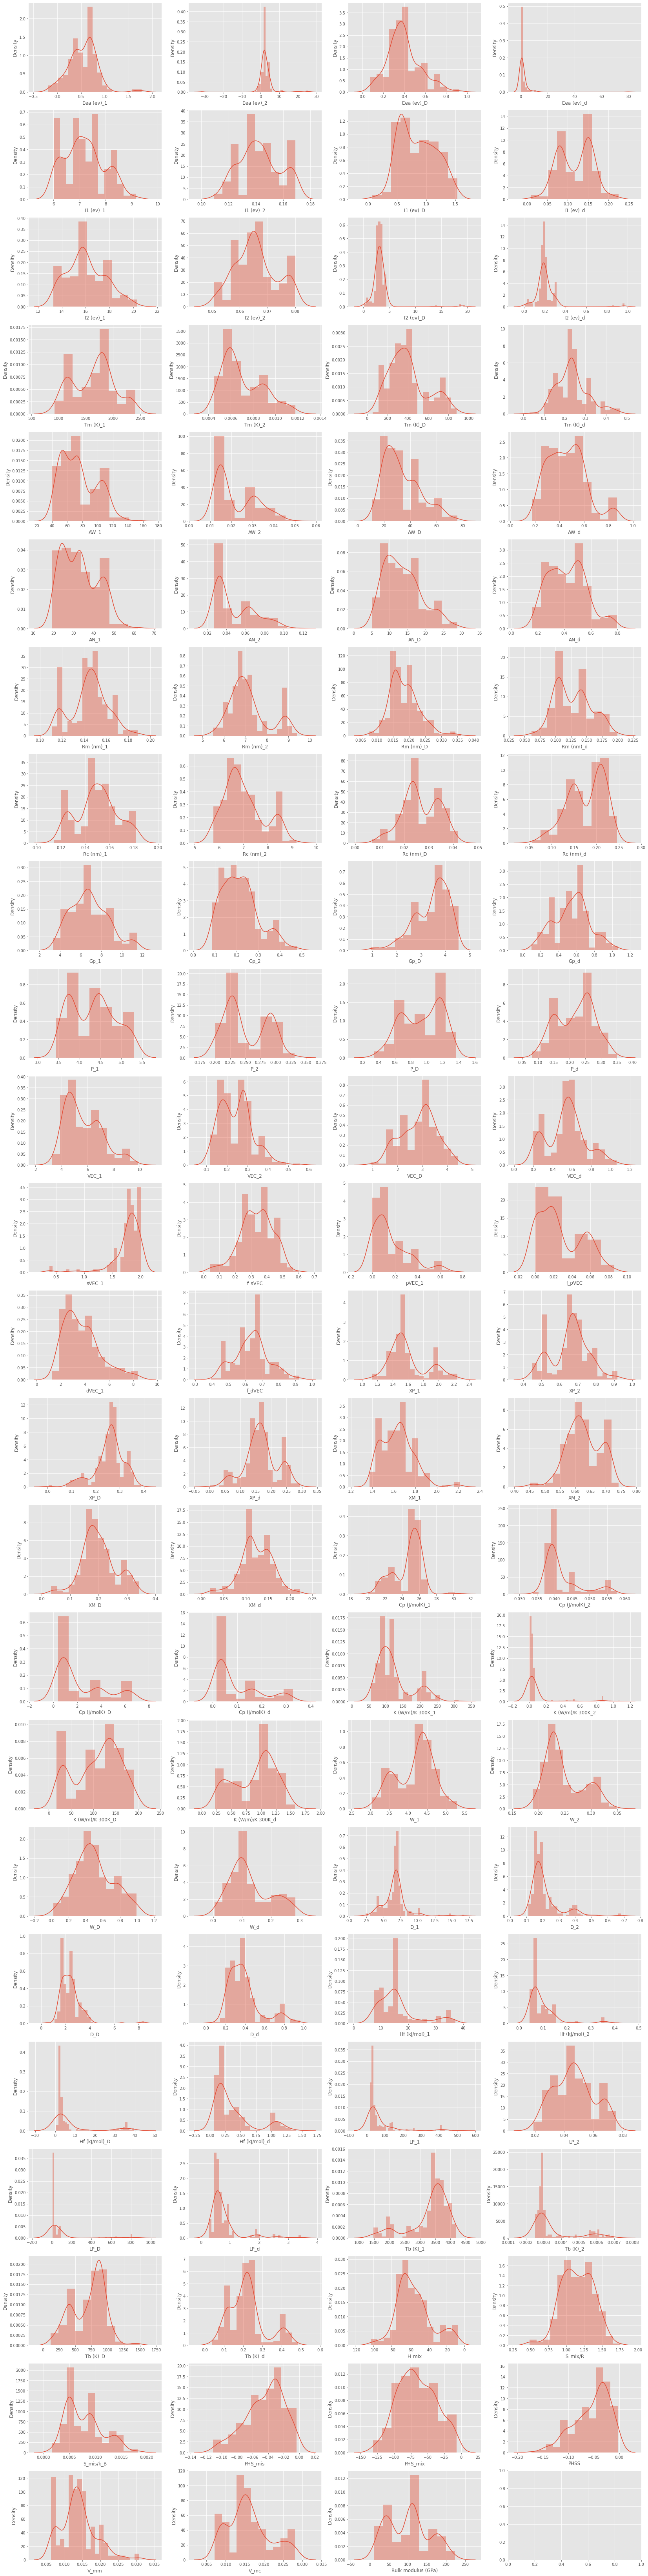

In [ ]:
# Create figure and axes array
n_cols = 4
n_rows = math.ceil(len(imputed_BM_data_df.select_dtypes(exclude='object').columns) / n_cols)
figure, axes_array = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*7, n_rows*5))

# Initialize axes array row and column indices
i = 0 # Row index of axes array of subplots
j = 0 # Column index of axes array of subplots

# Loop over columns to plot
for column_name in imputed_BM_data_df.select_dtypes(exclude='object').columns: # 'Id' and 'idhogar' are of 'object' data type
    # Plot in the subplot
    sns.distplot(imputed_BM_data_df[column_name], ax=axes_array[i][j])

    # Reset column index of axes array of subplots
    j += 1
    if j == n_cols: 
        j = 0
        i += 1

## Correlation heatmap

In [ ]:
# Get correlation matrix
BM_correlation_matrix_df = imputed_BM_data_df.corr()

# Plot
plt.figure(figsize=(80,85))
sns.heatmap(abs(BM_correlation_matrix_df), annot=True)

Observations:
1. No more null values left.

# Feature engineering

Useful resources:
1. https://towardsdatascience.com/why-how-and-when-to-apply-feature-selection-e9c69adfabf2

## Set of all features

In [ ]:
# Initialize dictionary to store feature subsets
selected_feature_subsets_dict = OrderedDict()

# Set of all features
selected_feature_subsets_dict['All'] = OrderedSet(imputed_BM_data_df.columns[1:-1])

# Display
print(selected_feature_subsets_dict['All'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['All'])}")

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mix', 'S_mix/R', 'S_mis/k_B', 'PHS_mi

# ML modeling

## Data preprocessing

### Separate X and y data

In [ ]:
# Input data
X_data_df = imputed_BM_data_df.iloc[:, 1:-1]

# Display
display(X_data_df)

# Target data
y_data_series = imputed_BM_data_df['Bulk modulus (GPa)']

# Display
display(y_data_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
0,-0.07662,1.465814,0.351122,4.582645,6.77246,0.153277,1.423277,0.210157,20.281848,0.069979,19.622814,0.967506,924.0154,0.001181,226.979143,0.245644,76.176450,0.031041,54.373559,0.713784,33.01,0.068954,21.285908,0.644832,0.175578,5.837985,0.027582,0.157091,0.16277,6.368541,0.029466,0.181030,4.09,0.438333,3.992731,0.976218,4.29,0.258333,1.202456,0.280293,4.09,0.438333,3.992731,0.976218,1.89,0.462103,0.00,0.000000,2.20,0.537897,1.1977,0.871416,0.261013,0.217928,1.4802,0.699262,0.300832,0.203237,25.86461,0.038689,0.675795,0.026128,100.597,0.015996,63.589728,0.632124,3.1144,0.334483,0.673837,0.216362,3.85934,0.520341,2.644902,0.685325,7.50026,0.147658,1.665397,0.222045,54.21483,0.025738,48.407413,0.892881,1512.67,0.000674,204.142621,0.134955,-24.3040,1.747066,0.001126,-0.027362,-42.460684,-0.047802,0.024365,0.019802
1,-0.11790,10.911034,0.320653,2.719701,6.71230,0.155537,1.509030,0.224816,16.248016,0.076169,13.911044,0.856169,929.7830,0.001133,176.851130,0.190207,69.640750,0.023283,26.503803,0.380579,30.75,0.051623,11.085463,0.360503,0.188630,5.487874,0.033104,0.175497,0.16895,6.170722,0.032389,0.191708,3.95,0.441667,4.030819,1.020460,4.35,0.245000,0.909670,0.209120,3.95,0.441667,4.030819,1.020460,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1455,0.918315,0.281540,0.245779,1.4670,0.710490,0.323003,0.220179,25.89135,0.038647,0.644569,0.024895,72.015,0.020273,47.558367,0.660395,3.2200,0.321016,0.624500,0.193944,3.29970,0.435124,1.989487,0.602930,7.93750,0.133023,1.236345,0.155760,70.70785,0.020632,57.375514,0.811445,1514.35,0.000673,195.371339,0.129013,-24.5600,1.062738,0.001405,-0.034509,-26.100835,-0.036674,0.030634,0.022357
2,-0.17280,10.721795,0.282423,1.634390,6.85996,0.152316,1.529115,0.222904,13.276383,0.078617,2.901851,0.218572,948.6466,0.001084,143.919894,0.151711,71.330500,0.017619,23.770783,0.333249,31.56,0.038123,9.710118,0.307672,0.188628,5.489462,0.033183,0.175918,0.16922,6.156798,0.032135,0.189900,4.20,0.408333,4.142463,0.986301,4.42,0.235000,0.776917,0.175773,4.20,0.408333,4.142463,0.986301,2.00,0.476190,0.00,0.000000,2.20,0.523810,1.1688,0.902317,0.288539,0.246867,1.4934,0.699499,0.331467,0.221955,25.90222,0.038630,0.631308,0.024373,74.780,0.020048,49.964043,0.668147,3.2608,0.317734,0.645563,0.197977,3.46800,0.361533,1.978690,0.570557,8.20256,0.122438,0.527182,0.064270,76.46654,0.018936,60.837409,0.795608,1498.09,0.000681,200.791375,0.134032,-26.8992,0.948267,0.001412,-0.037977,-25.507629,-0.036012,0.030643,0.022423
3,-0.07700,10.828915,0.397590,5.163513,6.74160,0.153952,1.387280,0.205779,13.334195,0.078514,3.066262,0.229955,986.5105,0.001041,151.904698,0.153982,70.417300,0.018158,24.677834,0.350451,31.15,0.039180,10.095915,0.324106,0.188455,5.503828,0.033666,0.178644,0.17010,6.103659,0.031000,0.182245,3.95,0.417045,3.904805,0.988558,4.40,0.236667,0.800000,0.181818,3.95,0.417045,3.904805,0.988558,1.95,0.493671,0.00,0.000000,2.00,0.506329,1.1745,0.901476,0.306830,0.261243,1.4765,0.704188,0.309278,0.209467,25.84430,0.038723,0.710693,0.027499,89.830,0.019697,87.200201,0.970725,3.2680,0.317558,0.669220,0.204780,3.45100,0.368804,2.130469,0.617348,8.52160,0.118943,1.143693,0.134211,78.97705,0.020996,63.942629,0.809636,1584.50,0.000654,339.889876,0.214509,-22.2600,1.062738,0.001456,-0.032409,

0       12.0
1       16.1
2       14.6
3       15.3
4       17.6
       ...  
273    201.0
274    192.5
275    166.8
276    215.7
277    224.1
Name: Bulk modulus (GPa), Length: 271, dtype: float64

### Train test split

In [ ]:
# Train test split
X_train_df, X_test_df, y_train_series, y_test_series = train_test_split(X_data_df, y_data_series, test_size=0.15, random_state=8)

# Display
display(X_train_df)
display(X_test_df)
display(y_train_series)
display(y_test_series)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
82,0.233100,-0.366121,0.766490,3.288245,7.509400,0.133751,0.455227,0.060621,16.700628,0.061808,3.016951,0.180649,1129.18300,0.000924,241.493511,0.213866,55.766250,0.028126,43.138173,0.773553,24.9500,0.058144,17.246666,0.691249,0.152465,6.638823,0.016336,0.107146,0.144650,6.994508,0.017636,0.121922,5.250,0.340152,4.229362,0.805593,3.750,0.282500,0.993730,0.264995,5.250,0.340152,4.229362,0.805593,1.6500,0.314286,0.0000,0.000000,3.6000,0.685714,1.508500,0.686573,0.295420,0.195837,1.69900,0.593195,0.141630,0.083361,26.025950,0.038990,3.676902,0.141278,230.01000,0.013816,138.187503,0.600789,4.162000,0.244624,0.567271,0.136298,5.037000,0.366176,3.691912,0.732958,10.32220,0.099382,1.729979,0.167598,124.046200,0.030798,90.451915,0.729179,2056.6500,0.000561,807.602037,0.392678,-16.660000,1.135901,0.000524,-0.008725,-18.924110,-0.009911,0.015351,0.013298
13,0.689480,1.620936,0.276257,0.400675,6.021100,0.168969,0.862644,0.143270,13.559101,0.079490,4.105969,0.302820,1112.60600,0.000910,128.893302,0.115848,113.488554,0.011849,41.755391,0.367926,47.7000,0.026658,16.266837,0.341024,0.167630,6.098886,0.023060,0.137563,0.181300,5.772970,0.034791,0.191897,5.600,0.259207,4.004997,0.715178,5.300,0.200000,1.100000,0.207547,4.600,0.284848,3.200000,0.695652,1.8000,0.391304,0.1000,0.021739,2.7000,0.586957,1.325000,0.792375,0.321970,0.242997,1.42400,0.715452,0.213738,0.150097,26.166000,0.038299,1.183927,0.045247,111.88000,0.062324,159.219778,1.423130,3.319000,0.316420,0.803647,0.242135,6.801000,0.162756,1.617019,0.237762,7.51100,0.152799,3.186834,0.424289,22.428800,0.049537,6.025464,0.268649,3447.5500,0.000295,410.443467,0.119054,-44.960000,0.801819,0.000863,-0.038814,-36.049762,-0.031122,0.020801,0.027562
267,0.412595,4.535974,0.386651,0.937120,8.125912,0.125632,1.283855,0.157995,17.679979,0.058260,3.383901,0.191397,2206.58500,0.000503,723.096651,0.327699,55.983355,0.029593,34.767937,0.621041,25.3756,0.062324,14.027349,0.552789,0.118844,8.760944,0.021740,0.182927,0.126067,8.349314,0.024797,0.196697,8.708,0.126118,2.740426,0.314702,3.795,0.288840,0.974359,0.256748,6.646,0.167517,1.797188,0.270416,1.8138,0.272916,0.3536,0.053205,4.4786,0.673879,1.944958,0.524355,0.282280,0.145134,1.76847,0.577231,0.289695,0.163811,21.990325,0.052998,6.126414,0.278596,87.52028,0.014119,29.226511,0.333940,4.600224,0.218781,0.315081,0.068492,7.049544,0.184036,2.452332,0.347871,30.93658,0.058576,34.257739,1.107354,22.134001,0.069316,20.779858,0.938821,3468.5712,0.000298,661.778145,0.190793,-53.263282,1.338467,0.001527,-0.081310,-71.291149,-0.108831,0.007719,0.009312
26,0.701220,1.603134,0.283313,0.404029,6.063120,0.167976,0.888908,0.146609,13.704823,0.078753,4.137562,0.301906,1125.80600,0.000903,154.847037,0.137543,111.860102,0.012047,42.269736,0.377880,47.1000,0.027027,16.428329,0.348797,0.166472,6.149810,0.023728,0.142535,0.179700,5.836221,0.035542,0.197783,5.740,0.254541,4.033906,0.702771,5.260,0.201667,1.110135,0.211052,4.740,0.280182,3.279085,0.691790,1.8000,0.379747,0.1000,0.021097,2.8400,0.599156,1.340800,0.784989,0.330786,0.246708,1.43420,0.711174,0.220128,0.153485,26.148600,0.038324,1.178806,0.045081,113.46600,0.060790,158.604759,1.397817,3.366000,0.313160,0.839824,0.249502,6.843600,0.162049,1.643481,0.240149,7.75120,0.150280,3.4637

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
204,0.297711,1.942429,0.577029,1.938218,7.555578,0.135048,1.122065,0.148508,15.681655,0.065713,2.770531,0.176673,1848.50443,0.000556,289.556457,0.156644,59.874182,0.039172,33.772729,0.564062,26.6735,0.087910,14.777479,0.554014,0.140109,7.300370,0.020506,0.146355,0.144072,7.391148,0.033387,0.231737,4.7015,0.286577,2.937243,0.624746,3.92900,0.292925,1.224320,0.311611,4.7015,0.286577,2.937243,0.624746,1.8985,0.403807,0.000,0.000000,2.8030,0.596193,1.520895,0.669336,0.211708,0.139200,1.688540,0.603166,0.232740,0.137835,22.958167,0.045149,3.904003,0.170049,113.40990,0.026897,122.257754,1.078017,4.463050,0.226883,0.506157,0.113411,5.553121,0.253820,2.504158,0.450946,15.185295,0.067294,2.143053,0.141127,32.541438,0.044675,16.924919,0.520104,3749.0615,0.000282,881.402918,0.235100,-74.284672,1.377761,0.000977,-0.072589,-102.346523,-0.100011,0.012252,0.014477
191,0.400640,0.856254,0.614636,1.534135,7.579000,0.134546,1.100648,0.145223,16.207183,0.064034,3.132165,0.193258,1793.55500,0.000579,342.160083,0.190772,63.751550,0.037155,33.563037,0.526466,28.2500,0.083621,14.703316,0.520471,0.140300,7.291645,0.020691,0.147478,0.144500,7.355249,0.033049,0.228714,5.2500,0.272727,3.418699,0.651181,4.00000,0.287500,1.224745,0.306186,5.2500,0.272727,3.418699,0.651181,1.7500,0.333333,0.000,0.000000,3.5000,0.666667,1.532500,0.666754,0.233707,0.152500,1.710000,0.595084,0.227156,0.132840,22.900750,0.045149,3.747254,0.163630,161.60000,0.023900,156.023508,0.965492,4.445000,0.227404,0.464839,0.104576,5.962500,0.239724,2.574843,0.431840,14.762500,0.069235,2.158522,0.146217,30.414500,0.047531,16.642191,0.547180,3735.4000,0.000286,947.320794,0.253606,-66.000000,1.039721,0.000992,-0.065488,-68.621571,-0.068089,0.012316,0.014560
251,0.228050,5.527382,0.181931,0.797769,7.925210,0.126434,0.337515,0.042588,18.137350,0.057198,3.861060,0.212879,1991.23000,0.000512,295.036563,0.148168,47.710610,0.034636,21.970834,0.460502,22.0700,0.074771,9.974222,0.451936,0.115545,8.945945,0.018859,0.163220,0.122880,8.482737,0.022543,0.183455,8.9700,0.118442,2.312812,0.257839,3.60000,0.304500,0.905539,0.251538,6.6700,0.177417,2.126288,0.318784,1.9400,0.290855,0.230,0.034483,4.5000,0.674663,1.864500,0.538223,0.110122,0.059062,1.696500,0.589830,0.043414,0.025590,21.847010,0.051471,5.881906,0.269232,66.37400,0.018489,22.403837,0.337539,4.646000,0.215395,0.120142,0.025859,6.640100,0.195508,2.355919,0.354802,22.928000,0.058304,15.196908,0.662810,29.308210,0.067383,31.565706,1.077026,3492.3100,0.000293,588.068563,0.168390,-45.380800,0.749998,0.001215,-0.055154,-34.035520,-0.041366,0.006949,0.008520
77,0.881350,1.351852,0.322759,0.366210,6.297900,0.160934,0.793164,0.125941,14.450692,0.072795,3.309001,0.228986,1483.03000,0.000719,321.723190,0.216936,105.943525,0.016120,59.539101,0.561989,44.4000,0.035100,23.247365,0.523589,0.158775,6.432684,0.022200,0.139821,0.162150,6.488469,0.035251,0.217397,6.7000,0.224786,4.302325,0.642138,4.85000,0.225000,1.314344,0.270999,4.2000,0.288889,2.400000,0.571429,2.0000,0.476190,0.250,0.059524,1.9500,0.464286,1.444000,0.716208,0.273905,0.189685,1.510500,0.667098,0.137531,0.091050,26.912500,0.037416,2.217661,0.082403,85.35500,0.052604,93.939020,1.100568,3.637500,0.285552,0.724996,0.199312,6.973500,0.181995,2.479075,0.355499,11.87

82      53.5
13      29.2
267    170.7
26      31.8
154    174.6
       ...  
85      60.7
48      48.2
197    175.0
142    112.1
139    111.4
Name: Bulk modulus (GPa), Length: 230, dtype: float64

204    111.9
191    108.9
251    182.6
77      50.2
30      39.1
106     92.9
115     66.1
22      31.1
94     132.3
228    112.6
95      63.8
199    100.7
240    176.0
52      44.8
80      58.0
120     71.3
3       15.3
263    167.9
171    116.4
210    109.8
193    112.3
169    113.4
183    113.6
25      32.9
117    102.1
229    113.8
184    159.4
78      60.1
71      54.3
103    160.0
88      62.0
215    132.3
118    109.0
34      35.7
79      52.2
114    107.7
145     91.6
4       17.6
56      44.1
188    109.6
226    128.9
Name: Bulk modulus (GPa), dtype: float64

### Feature scaling

In [ ]:
# Set the feature range
selected_feature_range_tuple = (0.2, 0.8)

# Create scaler model instance
min_max_scaler_model = MinMaxScaler(feature_range=selected_feature_range_tuple)

# Fit the model on train data
fitted_min_max_scaler_model = min_max_scaler_model.fit(X_train_df)

# Scale the train data
scaled_X_train_df = pd.DataFrame(fitted_min_max_scaler_model.transform(X_train_df), columns=X_train_df.columns,
                                         index=X_train_df.index)

# Display
display(scaled_X_train_df)
print('--'*100)

# Confirm
display(scaled_X_train_df.agg(['min', 'max']))
print('__'*100)

# Scale the test data
scaled_X_test_df = pd.DataFrame(fitted_min_max_scaler_model.transform(X_test_df), columns=X_test_df.columns,
                                        index=X_test_df.index)

# Display
display(scaled_X_test_df)

# Confirm
display(scaled_X_train_df.agg(['min', 'max']))
print('__'*100)

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
82,0.328767,0.528620,0.703866,0.223967,0.484190,0.443828,0.357398,0.344059,0.493278,0.422508,0.278947,0.298553,0.282766,0.588738,0.335235,0.452848,0.285188,0.453137,0.497258,0.718693,0.279802,0.418917,0.506893,0.702138,0.519513,0.376787,0.386604,0.397730,0.469466,0.415019,0.386227,0.406963,0.346250,0.583480,0.748235,0.633909,0.300000,0.575949,0.584895,0.609004,0.3950,0.505116,0.764176,0.623707,0.670370,0.489323,0.20000,0.200000,0.395745,0.532395,0.403655,0.505125,0.614937,0.572438,0.432257,0.490626,0.410920,0.390601,0.583310,0.300178,0.517221,0.440462,0.733941,0.205210,0.620728,0.368722,0.496433,0.409377,0.536470,0.482576,0.310958,0.468382,0.445670,0.652728,0.256990,0.287884,0.218535,0.246468,0.329749,0.326065,0.259049,0.287127,0.328791,0.615020,0.501488,0.677155,0.737206,0.509164,0.327576,0.769521,0.741466,0.776503,0.421177,0.375666
13,0.468125,0.549329,0.347941,0.202221,0.201633,0.798533,0.524982,0.573562,0.224214,0.788091,0.313118,0.376410,0.276079,0.577050,0.253463,0.317551,0.589456,0.200000,0.484433,0.364920,0.599636,0.200000,0.481932,0.371465,0.637129,0.293852,0.527641,0.529632,0.795727,0.200000,0.681051,0.627943,0.372500,0.459092,0.710681,0.575162,0.800000,0.200000,0.647111,0.481004,0.3300,0.429408,0.586874,0.547886,0.725926,0.571331,0.28000,0.352174,0.319149,0.419888,0.304467,0.639750,0.666962,0.683240,0.236335,0.743732,0.551147,0.587736,0.592286,0.281721,0.274688,0.255799,0.370818,0.232428,0.693810,0.735355,0.271355,0.679522,0.681798,0.708451,0.384648,0.253964,0.292476,0.328321,0.200217,0.373281,0.240984,0.361904,0.207093,0.525219,0.200017,0.200009,0.637060,0.257198,0.327734,0.311136,0.559860,0.350183,0.451028,0.601884,0.659310,0.701168,0.556198,0.784551
267,0.383577,0.579710,0.428091,0.206261,0.601236,0.362059,0.698240,0.614451,0.577157,0.349162,0.290461,0.305402,0.717397,0.242073,0.684984,0.609976,0.286333,0.475955,0.419627,0.585677,0.285786,0.447980,0.424880,0.571408,0.258758,0.702747,0.499955,0.726351,0.304037,0.653497,0.509295,0.643101,0.605600,0.254572,0.499020,0.314954,0.314516,0.604841,0.573554,0.590629,0.5346,0.268783,0.345246,0.254618,0.731037,0.445274,0.48288,0.572435,0.470519,0.518912,0.639574,0.298715,0.589190,0.453313,0.481751,0.457574,0.698858,0.628247,0.324654,0.674271,0.755526,0.704515,0.295938,0.205380,0.242115,0.249750,0.613437,0.312136,0.381420,0.337870,0.395031,0.276395,0.354149,0.400454,0.673306,0.222649,0.719774,0.669086,0.206737,0.735422,0.210334,0.326784,0.641719,0.261553,0.437691,0.407099,0.507826,0.605559,0.692161,0.365121,0.490247,0.425166,0.232111,0.261413
26,0.471709,0.549144,0.353064,0.202246,0.209610,0.788532,0.535785,0.582833,0.236695,0.772854,0.314109,0.375827,0.281404,0.571167,0.272311,0.347498,0.580872,0.203080,0.489204,0.373602,0.591201,0.202569,0.486046,0.378804,0.628148,0.301674,0.541659,0.551191,0.781484,0.211134,0.693953,0.646532,0.383000,0.451921,0.715520,0.567101,0.787097,0.207595,0.653045,0.488814,0.3440,0.423019,0.600496,0.545223,0.725926,0.559025,0.28000,0.347679,0.331064,0.433786,0.313008,0.630352,0.684235,0.691959,0.243602,0.734875,0.563573,0.597744,0.591171,0.282383,0.274190,0.255480,0.375693,0.231567,0.691673,0.724070,0.283904,0.667258,0.704040,0.724172,0.386427,0.253219,0.294430,0.329884,0.205068,0.369255,0.245252,0.372059,0.206718,0.53

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
204,0.348497,0.552680,0.566312,0.213800,0.492957,0.456893,0.631691,0.588107,0.406005,0.503244,0.271215,0.296019,0.572945,0.285649,0.370139,0.373863,0.306842,0.624921,0.410396,0.535982,0.304032,0.625872,0.443990,0.572564,0.423681,0.478402,0.474065,0.567756,0.464320,0.484837,0.656920,0.753757,0.305112,0.501151,0.531962,0.516404,0.357742,0.623456,0.719895,0.712870,0.34015,0.431774,0.541615,0.498985,0.762407,0.584644,0.2000,0.200000,0.327915,0.430410,0.410355,0.483192,0.450910,0.439371,0.424805,0.511268,0.588100,0.551516,0.386686,0.464651,0.539315,0.495785,0.375521,0.212550,0.565376,0.581490,0.576812,0.342620,0.498896,0.433732,0.332518,0.349952,0.357975,0.467979,0.355202,0.236586,0.224900,0.234563,0.219299,0.473541,0.207638,0.247576,0.703885,0.240697,0.533775,0.466367,0.376093,0.624258,0.492427,0.413709,0.341266,0.456493,0.344421,0.409460
191,0.379926,0.541360,0.593615,0.210757,0.497404,0.451833,0.622881,0.578986,0.451015,0.468536,0.282562,0.306588,0.550778,0.305191,0.408341,0.420971,0.327281,0.593557,0.408452,0.503193,0.326196,0.596049,0.442100,0.540894,0.425165,0.477061,0.477958,0.572628,0.468131,0.478518,0.651118,0.744210,0.346250,0.479868,0.612548,0.533580,0.380645,0.598734,0.720144,0.700783,0.39500,0.412814,0.624543,0.517216,0.707407,0.509605,0.2000,0.200000,0.387234,0.510695,0.416628,0.479907,0.494014,0.470620,0.440094,0.494535,0.577241,0.536760,0.383006,0.464655,0.524066,0.483443,0.523654,0.210868,0.682704,0.531322,0.571993,0.344582,0.473493,0.414877,0.349620,0.335094,0.363194,0.455463,0.346664,0.239688,0.225138,0.236852,0.216732,0.503900,0.207441,0.252698,0.700857,0.245654,0.562614,0.491122,0.428010,0.463394,0.497902,0.453275,0.503054,0.569871,0.345993,0.411841
251,0.327225,0.590043,0.279457,0.205211,0.563132,0.370131,0.308979,0.293983,0.616329,0.327199,0.305433,0.319092,0.630521,0.249601,0.374119,0.362163,0.242725,0.554379,0.300937,0.445661,0.239314,0.534520,0.321625,0.476185,0.233171,0.731164,0.439532,0.640893,0.275668,0.676983,0.470558,0.601284,0.625250,0.242776,0.427446,0.278007,0.251613,0.676203,0.533262,0.579022,0.53700,0.282336,0.401932,0.287975,0.777778,0.464374,0.3840,0.441379,0.472340,0.519804,0.596084,0.316361,0.251856,0.251089,0.430476,0.483658,0.219922,0.219950,0.315468,0.633477,0.731739,0.686508,0.230936,0.207832,0.218408,0.251355,0.625659,0.299395,0.261569,0.246883,0.377926,0.288487,0.347031,0.404994,0.511569,0.222213,0.426055,0.469170,0.215396,0.714877,0.217875,0.352929,0.646980,0.255223,0.405444,0.377131,0.557223,0.325523,0.579022,0.510846,0.668973,0.664785,0.213040,0.238709
77,0.526713,0.546525,0.381703,0.201961,0.254184,0.717610,0.496403,0.525442,0.300577,0.649661,0.288111,0.329357,0.425510,0.419723,0.393499,0.457087,0.549685,0.266415,0.649373,0.534175,0.553243,0.258694,0.659763,0.543838,0.568452,0.345124,0.509611,0.539426,0.625252,0.325945,0.688956,0.708471,0.455000,0.406196,0.760448,0.527705,0.654839,0.313924,0.772600,0.622381,0.29000,0.434939,0.449077,0.462214,0.800000,0.661717,0.4000,0.616667,0.255319,0.280140,0.368791,0.542833,0.572780,0.557985,0.297961,0.643625,0.402949,0.413315,0.640132,0.258146,0.375257,0.327247,0.289282,0.226974,0.466975,0.591544,0.356393,0.563378,0.633442,0.617058,0.391854,0.274243,0.356124,0.405451,0.288360,0.267208,0.225119,0.252790,0.254150,0.

,Eea (ev)_1,Eea (ev)_2,Eea (ev)_D,Eea (ev)_d,I1 (ev)_1,I1 (ev)_2,I1 (ev)_D,I1 (ev)_d,I2 (ev)_1,I2 (ev)_2,I2 (ev)_D,I2 (ev)_d,Tm (K)_1,Tm (K)_2,Tm (K)_D,Tm (K)_d,AW_1,AW_2,AW_D,AW_d,AN_1,AN_2,AN_D,AN_d,Rm (nm)_1,Rm (nm)_2,Rm (nm)_D,Rm (nm)_d,Rc (nm)_1,Rc (nm)_2,Rc (nm)_D,Rc (nm)_d,Gp_1,Gp_2,Gp_D,Gp_d,P_1,P_2,P_D,P_d,VEC_1,VEC_2,VEC_D,VEC_d,sVEC_1,f_sVEC,pVEC_1,f_pVEC,dVEC_1,f_dVEC,XP_1,XP_2,XP_D,XP_d,XM_1,XM_2,XM_D,XM_d,Cp (J/molK)_1,Cp (J/molK)_2,Cp (J/molK)_D,Cp (J/molK)_d,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,K (W/m)/K 300K_d,W_1,W_2,W_D,W_d,D_1,D_2,D_D,D_d,Hf (kJ/mol)_1,Hf (kJ/mol)_2,Hf (kJ/mol)_D,Hf (kJ/mol)_d,LP_1,LP_2,LP_D,LP_d,Tb (K)_1,Tb (K)_2,Tb (K)_D,Tb (K)_d,H_mix,S_mix/R,S_mis/k_B,PHS_mis,PHS_mix,PHSS,V_mm,V_mc
min,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2
max,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8,0.8


________________________________________________________________________________________________________________________________________________________________________________________________________


### Store final train and test data

In [ ]:
X_train = scaled_X_train_df
X_test = scaled_X_test_df
y_train = y_train_series
y_test = y_test_series

## Feature selection

Useful resource:
1. https://scikit-learn.org/stable/modules/feature_selection.html

### Based on correlation

In [ ]:
# Calculate correlation matrix
BM_correlation_matrix_df = X_train.corr(method='pearson')

# Set max allowed correlation
max_allowed_absolute_correlation = 0.75

# Initialize the set to store correlated variables
correlated_features_set = OrderedSet()

# Get correlated variables
for i, diagonal_column_name in enumerate(BM_correlation_matrix_df.columns):
    for j, left_column_name in enumerate(BM_correlation_matrix_df.columns):
        if j >= i: # Condition to skip checking duplicates.
            continue
        elif abs(BM_correlation_matrix_df.iloc[i, j]) >= max_allowed_absolute_correlation:
            print(f'Absolute correlation between {left_column_name} and {diagonal_column_name} is {abs(BM_correlation_matrix_df.iloc[i, j])}.')

            if diagonal_column_name in ['XP_1', 'V_mm', 'Rm (nm)_d', 'S_mix/R']:
                if left_column_name in ['XP_1', 'V_mm', 'Rm (nm)_d', 'S_mix/R']:
                    continue
                else:
                    column_name_to_drop = left_column_name
            else:
                column_name_to_drop = diagonal_column_name

            print(f'    Adding {column_name_to_drop} to correlated variables set')
            correlated_features_set.add(column_name_to_drop)

# Get features selected based on correlation
selected_feature_subsets_dict['Correlation'] = selected_feature_subsets_dict['All'] - correlated_features_set

# Display
display(selected_feature_subsets_dict['Correlation'])
print('--'*50)
print(f"Total features in the set: {len(selected_feature_subsets_dict['Correlation'])}")

Absolute correlation between I1 (ev)_1 and I1 (ev)_2 is 0.987685818304293.
    Adding I1 (ev)_2 to correlated variables set
Absolute correlation between I1 (ev)_D and I1 (ev)_d is 0.9446217326793935.
    Adding I1 (ev)_d to correlated variables set
Absolute correlation between I1 (ev)_1 and I2 (ev)_1 is 0.8384931958892872.
    Adding I2 (ev)_1 to correlated variables set
Absolute correlation between I1 (ev)_2 and I2 (ev)_1 is 0.8443096258890875.
    Adding I2 (ev)_1 to correlated variables set
Absolute correlation between I1 (ev)_1 and I2 (ev)_2 is 0.9004247012098253.
    Adding I2 (ev)_2 to correlated variables set
Absolute correlation between I1 (ev)_2 and I2 (ev)_2 is 0.9313593262654868.
    Adding I2 (ev)_2 to correlated variables set
Absolute correlation between I2 (ev)_1 and I2 (ev)_2 is 0.9192498541624781.
    Adding I2 (ev)_2 to correlated variables set
Absolute correlation between I2 (ev)_D and I2 (ev)_d is 0.973042857925034.
    Adding I2 (ev)_d to correlated variables set
Ab

OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_D', 'I2 (ev)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_d', 'VEC_D', 'sVEC_1', 'XP_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'D_D', 'Tb (K)_D', 'H_mix', 'S_mix/R', 'V_mm'])

----------------------------------------------------------------------------------------------------
Total features in the set: 22


### Based on variance

       Feature names  Variances
0   K (W/m)/K 300K_D   0.032179
1   K (W/m)/K 300K_1   0.023352
2               AW_d   0.017825
3          I1 (ev)_D   0.017576
4               XP_1   0.017299
5          Rm (nm)_d   0.016394
6               AW_D   0.015895
7              VEC_D   0.015727
8               AW_1   0.014922
9              H_mix   0.014317
10              XP_D   0.013632
11              V_mm   0.013630
12        Eea (ev)_D   0.011943
13          Tb (K)_D   0.011901
14  K (W/m)/K 300K_2   0.011074
15           S_mix/R   0.010663
16            sVEC_1   0.009259
17        Eea (ev)_1   0.008002
18               D_D   0.004723
19         I2 (ev)_D   0.004252
20        Eea (ev)_2   0.001809
21        Eea (ev)_d   0.001762
----------------------------------------------------------------------------------------------------


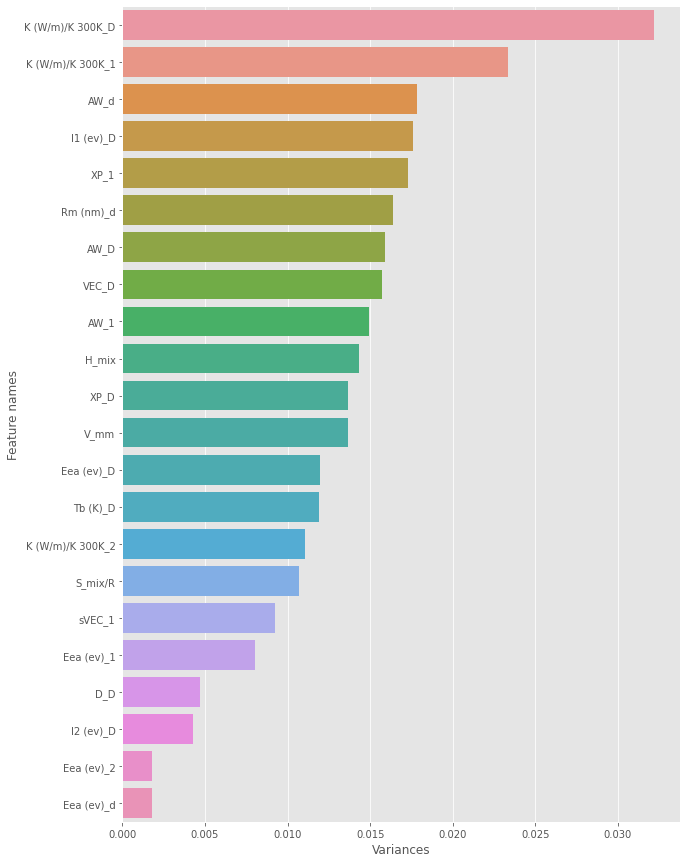

----------------------------------------------------------------------------------------------------


OrderedSet(['Eea (ev)_D', 'I1 (ev)_D', 'AW_1', 'AW_D', 'AW_d', 'Rm (nm)_d', 'VEC_D', 'XP_1', 'XP_D', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'S_mix/R', 'V_mm'])

----------------------------------------------------------------------------------------------------
Number of features selected: 16


In [ ]:
# Create variance threshold model instance
variance_threshold_model = VarianceThreshold(threshold=0.01)

# Fit model on train data
fitted_variance_threshold_model = variance_threshold_model.fit(X_train[selected_feature_subsets_dict['Correlation']])

# Initiate dataframe to store variance threshold results
variance_threshold_results_df = pd.DataFrame()

# Get feature names
variance_threshold_results_df['Feature names'] = X_train[selected_feature_subsets_dict['Correlation']].columns
variance_threshold_results_df['Variances'] = fitted_variance_threshold_model.variances_

# Sort according to variance values
variance_threshold_results_df.sort_values(by='Variances', ascending=False, inplace=True, ignore_index=True)

# Display
print(variance_threshold_results_df.to_string())
print('--'*50)

# Plot
plt.figure(figsize=(10,15))
sns.barplot(data=variance_threshold_results_df, x='Variances', y='Feature names')
plt.show()
print('--'*50)

# Get features selected based on variance threshold
selected_features_indices_boolean_list = fitted_variance_threshold_model.get_support()
selected_feature_subsets_dict['Variance threshold'] = OrderedSet(X_train[selected_feature_subsets_dict['Correlation']].columns[selected_features_indices_boolean_list])

# Display selected features set
display(selected_feature_subsets_dict['Variance threshold'])
print('--'*50)
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

### Based on mutual information

Useful resources
1. https://scikit-learn.org/stable/auto_examples/feature_selection/plot_f_test_vs_mi.html#sphx-glr-auto-examples-feature-selection-plot-f-test-vs-mi-py

2. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html#sklearn.feature_selection.mutual_info_classif

3. https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html#sklearn.feature_selection.mutual_info_regression

            Features  Mutual info
0               XP_1     1.579735
1               V_mm     1.548980
2           Tb (K)_D     1.258716
3   K (W/m)/K 300K_2     1.191447
4   K (W/m)/K 300K_D     1.129772
5              VEC_D     1.111871
6          I1 (ev)_D     1.073383
7               AW_1     1.019293
8               AW_D     0.941421
9         Eea (ev)_1     0.905461
10               D_D     0.902198
11         I2 (ev)_D     0.890079
12              AW_d     0.852928
13        Eea (ev)_D     0.812357
14             H_mix     0.809806
15              XP_D     0.805547
16            sVEC_1     0.793781
17        Eea (ev)_d     0.758537
18        Eea (ev)_2     0.738125
19         Rm (nm)_d     0.708941
20  K (W/m)/K 300K_1     0.697743
21           S_mix/R     0.261502


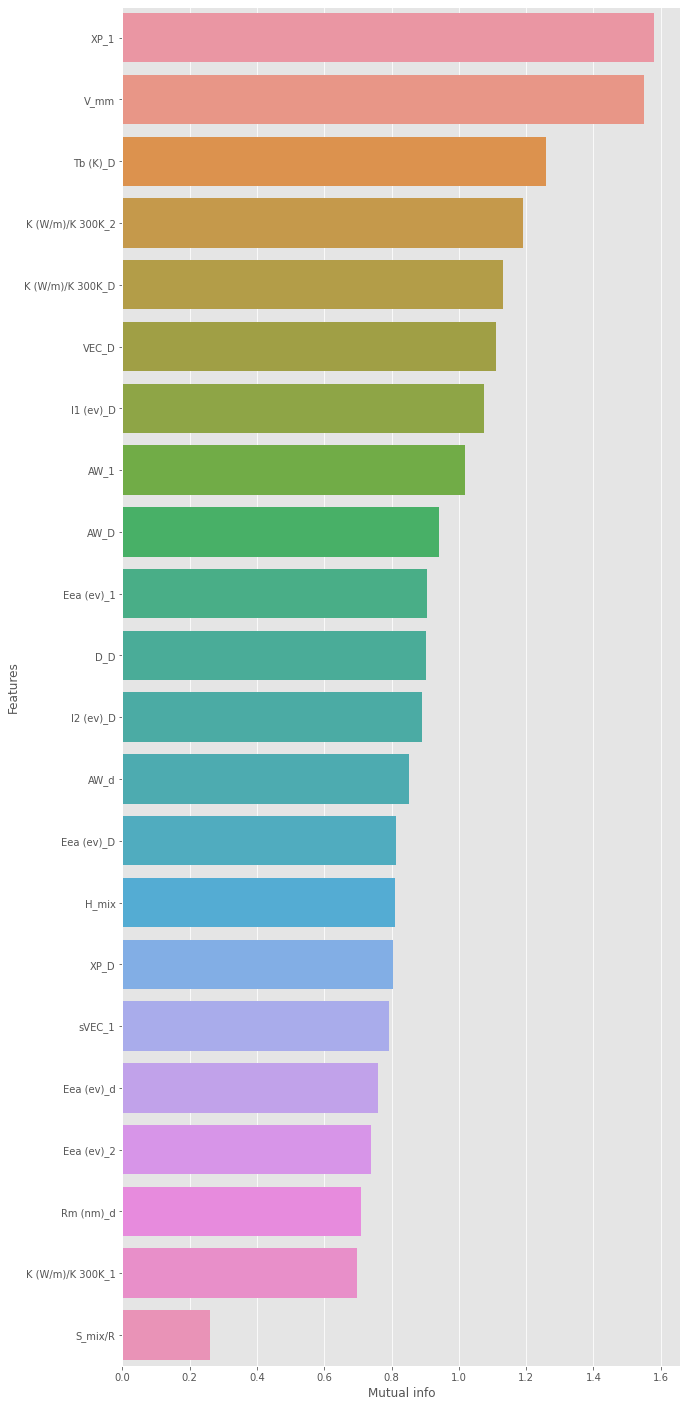

In [ ]:
mutual_info_df = pd.DataFrame()

mutual_info_df['Features'] = X_train[selected_feature_subsets_dict['Correlation']].columns
mutual_info_df['Mutual info'] = mutual_info_regression(X_train[selected_feature_subsets_dict['Correlation']], y_train)

mutual_info_df.sort_values(by='Mutual info', ascending=False, ignore_index=True, inplace=True)

# Display
print(mutual_info_df.to_string())

# Plot
plt.figure(figsize=(10,25))
sns.barplot(data=mutual_info_df, y='Features', x='Mutual info')

In [ ]:
# Set mutual information threshold
minimum_allowed_mutual_info = 0.7

# Get the set of features selected on the basis of mutual gain
selected_feature_subsets_dict['Mutual info'] = OrderedSet(mutual_info_df.loc[mutual_info_df['Mutual info'] >= minimum_allowed_mutual_info , 'Features'])

# Display
display(selected_feature_subsets_dict['Mutual info'])
print('--'*50)
print(f"Number of features in the set: {len(selected_feature_subsets_dict['Mutual info'])}")

OrderedSet(['XP_1', 'V_mm', 'Tb (K)_D', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'VEC_D', 'I1 (ev)_D', 'AW_1', 'AW_D', 'Eea (ev)_1', 'D_D', 'I2 (ev)_D', 'AW_d', 'Eea (ev)_D', 'H_mix', 'XP_D', 'sVEC_1', 'Eea (ev)_d', 'Eea (ev)_2', 'Rm (nm)_d'])

----------------------------------------------------------------------------------------------------
Number of features in the set: 20


### Show features selected so far (based on filter methods)

In [ ]:
selected_feature_subsets_dict

OrderedDict([('All',
              OrderedSet(['Eea (ev)_1', 'Eea (ev)_2', 'Eea (ev)_D', 'Eea (ev)_d', 'I1 (ev)_1', 'I1 (ev)_2', 'I1 (ev)_D', 'I1 (ev)_d', 'I2 (ev)_1', 'I2 (ev)_2', 'I2 (ev)_D', 'I2 (ev)_d', 'Tm (K)_1', 'Tm (K)_2', 'Tm (K)_D', 'Tm (K)_d', 'AW_1', 'AW_2', 'AW_D', 'AW_d', 'AN_1', 'AN_2', 'AN_D', 'AN_d', 'Rm (nm)_1', 'Rm (nm)_2', 'Rm (nm)_D', 'Rm (nm)_d', 'Rc (nm)_1', 'Rc (nm)_2', 'Rc (nm)_D', 'Rc (nm)_d', 'Gp_1', 'Gp_2', 'Gp_D', 'Gp_d', 'P_1', 'P_2', 'P_D', 'P_d', 'VEC_1', 'VEC_2', 'VEC_D', 'VEC_d', 'sVEC_1', 'f_sVEC', 'pVEC_1', 'f_pVEC', 'dVEC_1', 'f_dVEC', 'XP_1', 'XP_2', 'XP_D', 'XP_d', 'XM_1', 'XM_2', 'XM_D', 'XM_d', 'Cp (J/molK)_1', 'Cp (J/molK)_2', 'Cp (J/molK)_D', 'Cp (J/molK)_d', 'K (W/m)/K 300K_1', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'K (W/m)/K 300K_d', 'W_1', 'W_2', 'W_D', 'W_d', 'D_1', 'D_2', 'D_D', 'D_d', 'Hf (kJ/mol)_1', 'Hf (kJ/mol)_2', 'Hf (kJ/mol)_D', 'Hf (kJ/mol)_d', 'LP_1', 'LP_2', 'LP_D', 'LP_d', 'Tb (K)_1', 'Tb (K)_2', 'Tb (K)_D', 'Tb (K)_d', 'H_mi

## Models selection

Useful resources:
1. https://medium.com/analytics-vidhya/accuracy-vs-f1-score-6258237beca2

2. https://towardsdatascience.com/multi-class-metrics-made-simple-part-ii-the-f1-score-ebe8b2c2ca1

In [ ]:
models_dict = {
    # 'Random Forest': Pipeline([('Min max scaler', MinMaxScaler(feature_range=(0.2, 0.8))),
    #                           ('Random forest Regressor', RandomForestRegressor(n_jobs=1, random_state=7))]),
    'Random Forest': RandomForestRegressor(n_jobs=1, random_state=7),
    'Logistic': LogisticRegression(n_jobs=-1),
    'K-Neighbors': KNeighborsRegressor(n_jobs=-1),
    'Support Vector (rbf)': SVR(kernel='rbf'),
    'Decision Tree': DecisionTreeRegressor(random_state=7),
    'Gradient Boosting': GradientBoostingRegressor(random_state=7),
    'Ada Boost': AdaBoostRegressor(random_state=7),
    'Extreme Gradient Boosting': XGBRegressor(random_state=7),
    'Light Gradient Boosting Machine': LGBMRegressor(random_state=7),
    'Cat boost': CatBoostRegressor(random_state=7)
}


# Initiate results dataframe
models_comparison_results_dict = {}

for model_name, model in models_dict.items():
    # Display current model
    print(f'Trying {model_name}: ')

    # Get cross validation score
    r2_cross_validation_score = cross_val_score(estimator=model, X=X_train, y=y_train, scoring='r2', 
                                                                cv=10, 
                                                                n_jobs=-1, verbose=100)

    # Display
    print(f'{r2_cross_validation_score.mean():.3f}')

    models_comparison_results_dict.setdefault('Regressor model', []).append(model_name)
    models_comparison_results_dict.setdefault('Mean R-squared score', []).append(r2_cross_validation_score.mean())
    models_comparison_results_dict.setdefault('Std R-squared score', []).append(r2_cross_validation_score.std())

# Convert results to dataframe
models_comparison_results_df = pd.DataFrame.from_dict(models_comparison_results_dict)    

# Sort based on R-squared score 
models_comparison_results_df.sort_values(by='Mean R-squared score', ascending=False, inplace=True, ignore_index=True)

# Display
display(models_comparison_results_df)

# Save results
save_path = '/content/drive/MyDrive/DDP/Stored data/BM/models_comparison_results_df.csv'
models_comparison_results_df.to_csv(save_path)

Trying Random Forest: 
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:    4.4s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    5.2s finished
0.981
Trying Logistic: 
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0111s.) Setting bat

,Regressor model,Mean R-squared score,Std R-squared score
0,Cat boost,0.984007,0.006871
1,Extreme Gradient Boosting,0.983954,0.010772
2,Light Gradient Boosting Machine,0.983188,0.011086
3,Gradient Boosting,0.982065,0.010288
4,Random Forest,0.980633,0.011878
5,Ada Boost,0.978610,0.012554
6,K-Neighbors,0.975185,0.018353
7,Decision Tree,0.965140,0.021282
8,Support Vector (rbf),0.540862,0.047876
9,Logistic,NaN,NaN


,Regressor model,Mean R-squared score,Std R-squared score
1,Cat boost,0.984007,0.006871
2,Extreme Gradient Boosting,0.983954,0.010772
3,Light Gradient Boosting Machine,0.983188,0.011086
4,Gradient Boosting,0.982065,0.010288
5,Random Forest,0.980633,0.011878
6,Ada Boost,0.978610,0.012554
7,K-Neighbors,0.975185,0.018353
8,Decision Tree,0.965140,0.021282
9,Support Vector (rbf),0.540862,0.047876
10,Logistic,NaN,NaN


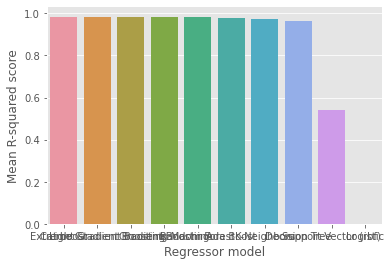

In [ ]:
# Load model comparison results
saved_path = '/content/drive/MyDrive/DDP/Stored data/BM/models_comparison_results_df.csv'
models_comparison_results_df = pd.read_csv(saved_path, index_col=0)

# Set indices to start from 1
models_comparison_results_df.index += 1

# Display
display(models_comparison_results_df)

# Plot
sns.barplot(data=models_comparison_results_df, x='Regressor model', y='Mean R-squared score')

## Catboost Regressor


### Initial features CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['All']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['All']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['All'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 94


In [ ]:
# Create validation model instance
fitted_initial_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=10, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_initial_CV_model_dict.joblib'
dump(fitted_initial_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:  2.7min finished


['/content/drive/MyDrive/DDP/Stored models/BM/fitted_initial_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_initial_CV_model_dict.joblib'
fitted_initial_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_initial_CV_model_df = pd.DataFrame.from_dict(fitted_initial_CV_model_dict)

# Display
fitted_initial_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,31.842416,0.008316,<catboost.core.CatBoostRegressor object at 0x7...,0.991083,0.999840
1,31.484833,0.007842,<catboost.core.CatBoostRegressor object at 0x7...,0.987530,0.999842
2,33.140923,0.008010,<catboost.core.CatBoostRegressor object at 0x7...,0.975386,0.999877
3,33.181098,0.007883,<catboost.core.CatBoostRegressor object at 0x7...,0.985512,0.999885
4,32.454265,0.007210,<catboost.core.CatBoostRegressor object at 0x7...,0.976824,0.999861
5,32.146828,0.013365,<catboost.core.CatBoostRegressor object at 0x7...,0.981194,0.999890
6,32.464662,0.006394,<catboost.core.CatBoostRegressor object at 0x7...,0.990985,0.999870
7,32.455385,0.006654,<catboost.core.CatBoostRegressor object at 0x7...,0.987301,0.999882
8,32.008380,0.007061,<catboost.core.CatBoostRegressor object at 0x7...,0.992300,0.999864
9,31.943343,0.010352,<catboost.core.CatBoostRegressor object at 0x7...,0.971954,0.999830


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_initial_CV_model_dict['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_initial_CV_model_dict['test_score'].std()}")


Mean R-squared cross validation score: 0.9840068622522844
Std R-squared cross validation score: 0.006871407552786573


In [ ]:
# Initialize dataframe
feature_importances_df = pd.DataFrame()

# Feature names
feature_importances_df['Features'] = X_train.columns

# Feature importances
feature_importances_df['Feature importances'] = fitted_initial_CV_model_dict['estimator'][0].feature_importances_

# Display
print(feature_importances_df.sort_values(by='Feature importances', ascending=True, inplace=False).to_string())

            Features  Feature importances
63  K (W/m)/K 300K_2             0.005977
37               P_2             0.029484
5          I1 (ev)_2             0.057791
88         S_mis/k_B             0.061919
49            f_dVEC             0.069186
45            f_sVEC             0.102667
2         Eea (ev)_D             0.111898
70               D_1             0.126988
85          Tb (K)_d             0.127491
21              AN_2             0.128549
17              AW_2             0.147464
44            sVEC_1             0.158251
16              AW_1             0.176027
87           S_mix/R             0.189920
89           PHS_mis             0.195057
73               D_d             0.201571
23              AN_d             0.214992
10         I2 (ev)_D             0.224692
22              AN_D             0.233662
6          I1 (ev)_D             0.242030
18              AW_D             0.246985
38               P_D             0.254296
77     Hf (kJ/mol)_d             0

### CT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Correlation']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Correlation']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Correlation'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 22


In [ ]:
# Create validation model instance
fitted_CT_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_CT_CV_model_dict.joblib'
dump(fitted_CT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   12.2s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   22.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   32.2s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   42.1s remaining:   10.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   51.8s finished


['/content/drive/MyDrive/DDP/Stored models/BM/fitted_CT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_CT_CV_model_dict.joblib'
fitted_CT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_CT_CV_model_df = pd.DataFrame.from_dict(fitted_CT_CV_model_dict)

# Display
fitted_CT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,10.235059,0.005092,<catboost.core.CatBoostRegressor object at 0x7...,0.993050,0.999776
1,10.235277,0.004978,<catboost.core.CatBoostRegressor object at 0x7...,0.969379,0.999760
2,9.997907,0.005513,<catboost.core.CatBoostRegressor object at 0x7...,0.977461,0.999763
3,9.718451,0.005681,<catboost.core.CatBoostRegressor object at 0x7...,0.979623,0.999799
4,10.251241,0.005565,<catboost.core.CatBoostRegressor object at 0x7...,0.975684,0.999776
5,10.214355,0.005877,<catboost.core.CatBoostRegressor object at 0x7...,0.972096,0.999838
6,9.675917,0.005753,<catboost.core.CatBoostRegressor object at 0x7...,0.984367,0.999794
7,9.647646,0.005463,<catboost.core.CatBoostRegressor object at 0x7...,0.985511,0.999816
8,9.835567,0.002270,<catboost.core.CatBoostRegressor object at 0x7...,0.987744,0.999796
9,9.536423,0.005724,<catboost.core.CatBoostRegressor object at 0x7...,0.971012,0.999759


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_CT_CV_model_df['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_CT_CV_model_df['test_score'].std()}")

Mean R-squared cross validation score: 0.9795927132469853
Std R-squared cross validation score: 0.007883275082243821


### VT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Variance threshold']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Variance threshold']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Variance threshold'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 16


In [ ]:
# Create validation model instance
fitted_VT_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_CV_model_dict.joblib'
dump(fitted_VT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   25.9s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   33.0s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   33.9s remaining:    8.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   41.6s finished


['/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_CV_model_dict.joblib'
fitted_VT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_VT_CV_model_df = pd.DataFrame.from_dict(fitted_VT_CV_model_dict)

# Display
fitted_VT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,8.671630,0.005528,<catboost.core.CatBoostRegressor object at 0x7...,0.995299,0.999706
1,8.847683,0.005491,<catboost.core.CatBoostRegressor object at 0x7...,0.977377,0.999686
2,8.505904,0.005561,<catboost.core.CatBoostRegressor object at 0x7...,0.979962,0.999744
3,8.270214,0.005796,<catboost.core.CatBoostRegressor object at 0x7...,0.980915,0.999719
4,8.741453,0.005427,<catboost.core.CatBoostRegressor object at 0x7...,0.965878,0.999680
5,8.489501,0.005012,<catboost.core.CatBoostRegressor object at 0x7...,0.968656,0.999771
6,7.184057,0.005521,<catboost.core.CatBoostRegressor object at 0x7...,0.972929,0.999737
7,7.973017,0.005571,<catboost.core.CatBoostRegressor object at 0x7...,0.982210,0.999727
8,8.378261,0.005965,<catboost.core.CatBoostRegressor object at 0x7...,0.990795,0.999711
9,7.711695,0.001964,<catboost.core.CatBoostRegressor object at 0x7...,0.970631,0.999671


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_VT_CV_model_df['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_VT_CV_model_df['test_score'].std()}")

Mean R-squared cross validation score: 0.9784652893423555
Std R-squared cross validation score: 0.009460530540744097


### MIT features cv score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['Mutual info'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 20


In [ ]:
# Create validation model instance
fitted_MIT_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_CV_model_dict.joblib'
dump(fitted_MIT_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    9.9s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   27.6s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   35.0s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   36.0s remaining:    9.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.6s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   44.6s finished


['/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_CV_model_dict.joblib'
fitted_MIT_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_CV_model_dict)

# Display
fitted_MIT_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,9.903721,0.006631,<catboost.core.CatBoostRegressor object at 0x7...,0.994000,0.999738
1,9.876474,0.005742,<catboost.core.CatBoostRegressor object at 0x7...,0.979584,0.999764
2,8.153296,0.005758,<catboost.core.CatBoostRegressor object at 0x7...,0.982922,0.999754
3,7.269955,0.005538,<catboost.core.CatBoostRegressor object at 0x7...,0.985797,0.999787
4,9.416529,0.005734,<catboost.core.CatBoostRegressor object at 0x7...,0.980104,0.999766
5,9.527125,0.005415,<catboost.core.CatBoostRegressor object at 0x7...,0.973927,0.999808
6,8.350155,0.005707,<catboost.core.CatBoostRegressor object at 0x7...,0.984299,0.999793
7,8.338833,0.005582,<catboost.core.CatBoostRegressor object at 0x7...,0.983026,0.999807
8,9.227836,0.005489,<catboost.core.CatBoostRegressor object at 0x7...,0.987466,0.999763
9,8.594847,0.002201,<catboost.core.CatBoostRegressor object at 0x7...,0.977863,0.999729


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_MIT_CV_model_df['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_MIT_CV_model_df['test_score'].std()}")

Mean R-squared cross validation score: 0.9828987238061041
Std R-squared cross validation score: 0.005569087523353758


### VT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Variance threshold']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Variance threshold']]  # Test data

# Print selected number of features
print(f'Number of features seelcted: {len(selected_feature_subsets_dict["Variance threshold"])}')

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features seelcted: 16


In [ ]:
# Create RFECV model instance
VT_RFECV_CBR_model = RFECV(estimator=CBR_estimator_model, cv=10, scoring='r2', verbose=100)

# Fit model on train data
fitted_VT_RFECV_CBR_model = VT_RFECV_CBR_model.fit(selected_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_RFECV_CBR_model.joblib'
dump(fitted_VT_RFECV_CBR_model, save_path)

Streaming output truncated to the last 5000 lines.
6:	learn: 47.0988369	total: 13.5ms	remaining: 1.91s
7:	learn: 45.9896760	total: 15.4ms	remaining: 1.91s
8:	learn: 44.8540575	total: 17.3ms	remaining: 1.91s
9:	learn: 43.7561279	total: 19.2ms	remaining: 1.9s
10:	learn: 42.7097810	total: 21ms	remaining: 1.89s
11:	learn: 41.8365558	total: 22.9ms	remaining: 1.89s
12:	learn: 40.9653581	total: 24.9ms	remaining: 1.89s
13:	learn: 40.0438210	total: 26.8ms	remaining: 1.88s
14:	learn: 39.1502065	total: 28.7ms	remaining: 1.88s
15:	learn: 38.2412989	total: 30.5ms	remaining: 1.88s
16:	learn: 37.3767128	total: 32.4ms	remaining: 1.87s
17:	learn: 36.5172350	total: 34.2ms	remaining: 1.87s
18:	learn: 35.7498551	total: 36.1ms	remaining: 1.86s
19:	learn: 35.0245706	total: 38ms	remaining: 1.86s
20:	learn: 34.2165755	total: 39.8ms	remaining: 1.86s
21:	learn: 33.4413066	total: 41.7ms	remaining: 1.85s
22:	learn: 32.6617893	total: 43.5ms	remaining: 1.85s
23:	learn: 31.9592912	total: 45.4ms	remaining: 1.84s
24:	

['/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_RFECV_CBR_model.joblib']

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_RFECV_CBR_model.joblib'
fitted_VT_RFECV_CBR_model = load(saved_path)

OrderedSet(['VEC_D', 'XP_1', 'K (W/m)/K 300K_D', 'Tb (K)_D', 'H_mix', 'V_mm'])

Number of features selected: 6
----------------------------------------------------------------------------------------------------
Input train data before eliminating features: 


,Eea (ev)_D,I1 (ev)_D,AW_1,AW_D,AW_d,Rm (nm)_d,VEC_D,XP_1,XP_D,K (W/m)/K 300K_1,K (W/m)/K 300K_2,K (W/m)/K 300K_D,Tb (K)_D,H_mix,S_mix/R,V_mm
82,0.703866,0.357398,0.285188,0.497258,0.718693,0.397730,0.764176,0.403655,0.614937,0.733941,0.205210,0.620728,0.501488,0.737206,0.509164,0.421177
13,0.347941,0.524982,0.589456,0.484433,0.364920,0.529632,0.586874,0.304467,0.666962,0.370818,0.232428,0.693810,0.327734,0.559860,0.350183,0.556198
267,0.428091,0.698240,0.286333,0.419627,0.585677,0.726351,0.345246,0.639574,0.589190,0.295938,0.205380,0.242115,0.437691,0.507826,0.605559,0.232111
26,0.353064,0.535785,0.580872,0.489204,0.373602,0.551191,0.600496,0.313008,0.684235,0.375693,0.231567,0.691673,0.327633,0.547387,0.393401,0.547598
154,0.387101,0.233247,0.470504,0.372704,0.329007,0.203306,0.426009,0.740947,0.281548,0.346980,0.204224,0.418878,0.215990,0.446949,0.284430,0.289200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.243760,0.483360,0.513602,0.625844,0.545705,0.546898,0.463800,0.374737,0.569497,0.283187,0.218287,0.446627,0.263131,0.424922,0.599601,0.478384
48,0.347776,0.522026,0.500847,0.563644,0.497761,0.374216,0.568374,0.347478,0.660876,0.422331,0.223291,0.644627,0.355592,0.429893,0.500071,0.415863
197,0.343304,0.600765,0.372026,0.372498,0.402438,0.330896,0.380179,0.713650,0.311351,0.226857,0.680588,0.256930,0.613413,0.556852,0.470627,0.253813
142,0.440803,0.425574,0.380911,0.268737,0.262278,0.431180,0.654469,0.457708,0.582418,0.677209,0.210122,0.775413,0.545640,0.525409,0.449146,0.368145


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features: 


,VEC_D,XP_1,K (W/m)/K 300K_D,Tb (K)_D,H_mix,V_mm
82,0.764176,0.403655,0.620728,0.501488,0.737206,0.421177
13,0.586874,0.304467,0.693810,0.327734,0.559860,0.556198
267,0.345246,0.639574,0.242115,0.437691,0.507826,0.232111
26,0.600496,0.313008,0.691673,0.327633,0.547387,0.547598
154,0.426009,0.740947,0.418878,0.215990,0.446949,0.289200
...,...,...,...,...,...,...
85,0.463800,0.374737,0.446627,0.263131,0.424922,0.478384
48,0.568374,0.347478,0.644627,0.355592,0.429893,0.415863
197,0.380179,0.713650,0.256930,0.613413,0.556852,0.253813
142,0.654469,0.457708,0.775413,0.545640,0.525409,0.368145


________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring:     6
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Features,Feature importances
4,H_mix,7.617116
3,Tb (K)_D,9.319511
0,VEC_D,10.056401
2,K (W/m)/K 300K_D,10.232693
5,V_mm,28.800300
1,XP_1,33.973979


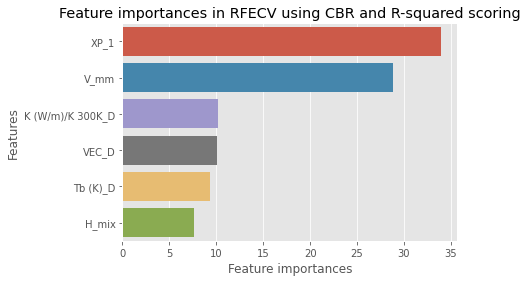

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


0     0.928934
1     0.956345
2     0.967504
3     0.973733
4     0.980846
5     0.981909
6     0.979378
7     0.980374
8     0.979153
9     0.979895
10    0.978125
11    0.977853
12    0.978062
13    0.977203
14    0.976735
15    0.978465
dtype: float64

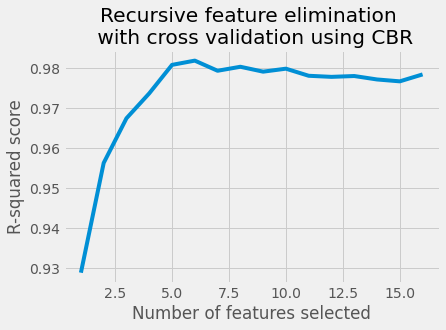

In [ ]:
# Get selected  features list
RFECV_selected_features_list = selected_X_train.loc[:, fitted_VT_RFECV_CBR_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['VT-RFECV'] = OrderedSet(RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['VT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_RFECV_CBR_X_train_df = pd.DataFrame(fitted_VT_RFECV_CBR_model.transform(selected_X_train), columns=RFECV_selected_features_list,
                                            index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_RFECV_CBR_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring: \
    {fitted_VT_RFECV_CBR_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_VT_RFECV_CBR_model.estimator_.feature_importances_

# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)

# Display 
display(feature_importances_df.sort_values(by='Feature importances', ascending=True, inplace=False))


# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using CBR and R-squared scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)

# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=range(min_features_to_select, n_grid_scores*step + min_features_to_select, step), 
         y=fitted_VT_RFECV_CBR_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using CBR')
plt.xlabel('Number of features selected')
plt.ylabel('R-squared score')

# Display CV grid scores
display(pd.Series(fitted_VT_RFECV_CBR_model.grid_scores_))

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['VT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['VT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['VT-RFECV'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 6


In [ ]:
# Create validation model instance
fitted_VT_RFECV_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_RFECV_CV_model_dict.joblib'
dump(fitted_VT_RFECV_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   11.0s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   14.1s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   17.3s finished


['/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_RFECV_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_VT_RFECV_CV_model_dict.joblib'
fitted_VT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_VT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_VT_RFECV_CV_model_dict)

# Display
fitted_VT_RFECV_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,3.600160,0.005514,<catboost.core.CatBoostRegressor object at 0x7...,0.991002,0.999177
1,3.319972,0.005481,<catboost.core.CatBoostRegressor object at 0x7...,0.990189,0.999126
2,3.532315,0.005619,<catboost.core.CatBoostRegressor object at 0x7...,0.967722,0.999190
3,3.549975,0.005713,<catboost.core.CatBoostRegressor object at 0x7...,0.966111,0.999274
4,2.468809,0.004153,<catboost.core.CatBoostRegressor object at 0x7...,0.981879,0.998987
5,2.391359,0.005523,<catboost.core.CatBoostRegressor object at 0x7...,0.951868,0.999345
6,3.086573,0.006994,<catboost.core.CatBoostRegressor object at 0x7...,0.988159,0.999053
7,2.788325,0.005502,<catboost.core.CatBoostRegressor object at 0x7...,0.985436,0.999245
8,3.071481,0.006866,<catboost.core.CatBoostRegressor object at 0x7...,0.985522,0.999146
9,3.230768,0.002323,<catboost.core.CatBoostRegressor object at 0x7...,0.987377,0.999011


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_VT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_VT_RFECV_CV_model_dict['test_score'].std()}")


Mean R-squared cross validation score: 0.9795265248444236
Std R-squared cross validation score: 0.012418593217050005


### MIT-RFECV

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['Mutual info']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['Mutual info']]  # Test data

# Print selected number of features
print(f'Number of features seelcted: {len(selected_feature_subsets_dict["Variance threshold"])}')

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features seelcted: 16


In [ ]:
# Create RFECV model instance
MIT_RFECV_CBR_model = RFECV(estimator=CBR_estimator_model, cv=10, scoring='r2', verbose=100)

# Fit model on train data
fitted_MIT_RFECV_CBR_model = MIT_RFECV_CBR_model.fit(selected_X_train, y_train)

# Save model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_RFECV_CBR_model.joblib'
dump(fitted_MIT_RFECV_CBR_model, save_path)

Streaming output truncated to the last 5000 lines.
6:	learn: 47.2346173	total: 18.5ms	remaining: 2.62s
7:	learn: 46.1961546	total: 21.2ms	remaining: 2.62s
8:	learn: 45.2007157	total: 23.9ms	remaining: 2.63s
9:	learn: 44.1328006	total: 26.4ms	remaining: 2.62s
10:	learn: 43.0952035	total: 29.1ms	remaining: 2.61s
11:	learn: 42.1225393	total: 31.7ms	remaining: 2.61s
12:	learn: 41.1710890	total: 34.3ms	remaining: 2.6s
13:	learn: 40.2405989	total: 36.9ms	remaining: 2.6s
14:	learn: 39.4142061	total: 39.6ms	remaining: 2.6s
15:	learn: 38.5357604	total: 42.1ms	remaining: 2.59s
16:	learn: 37.6901028	total: 44.8ms	remaining: 2.59s
17:	learn: 36.8032977	total: 47.5ms	remaining: 2.59s
18:	learn: 35.9703694	total: 50.1ms	remaining: 2.58s
19:	learn: 35.2285679	total: 52.7ms	remaining: 2.58s
20:	learn: 34.4626397	total: 55.3ms	remaining: 2.58s
21:	learn: 33.6880981	total: 57.9ms	remaining: 2.58s
22:	learn: 32.9527121	total: 60.6ms	remaining: 2.58s
23:	learn: 32.2514563	total: 63.3ms	remaining: 2.57s
24

['/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_RFECV_CBR_model.joblib']

In [ ]:
# Load model
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_RFECV_CBR_model.joblib'
fitted_MIT_RFECV_CBR_model = load(saved_path)

OrderedSet(['XP_1', 'V_mm', 'Tb (K)_D', 'K (W/m)/K 300K_2', 'K (W/m)/K 300K_D', 'I1 (ev)_D', 'D_D', 'AW_d', 'H_mix', 'XP_D', 'Eea (ev)_d'])

Number of features selected: 11
----------------------------------------------------------------------------------------------------
Input train data before eliminating features: 


,XP_1,V_mm,Tb (K)_D,K (W/m)/K 300K_2,K (W/m)/K 300K_D,VEC_D,I1 (ev)_D,AW_1,AW_D,Eea (ev)_1,D_D,I2 (ev)_D,AW_d,Eea (ev)_D,H_mix,XP_D,sVEC_1,Eea (ev)_d,Eea (ev)_2,Rm (nm)_d
82,0.403655,0.421177,0.501488,0.205210,0.620728,0.764176,0.357398,0.285188,0.497258,0.328767,0.445670,0.278947,0.718693,0.703866,0.737206,0.614937,0.670370,0.223967,0.528620,0.397730
13,0.304467,0.556198,0.327734,0.232428,0.693810,0.586874,0.524982,0.589456,0.484433,0.468125,0.292476,0.313118,0.364920,0.347941,0.559860,0.666962,0.725926,0.202221,0.549329,0.529632
267,0.639574,0.232111,0.437691,0.205380,0.242115,0.345246,0.698240,0.286333,0.419627,0.383577,0.354149,0.290461,0.585677,0.428091,0.507826,0.589190,0.731037,0.206261,0.579710,0.726351
26,0.313008,0.547598,0.327633,0.231567,0.691673,0.600496,0.535785,0.580872,0.489204,0.471709,0.294430,0.314109,0.373602,0.353064,0.547387,0.684235,0.725926,0.202246,0.549144,0.551191
154,0.740947,0.289200,0.215990,0.204224,0.418878,0.426009,0.233247,0.470504,0.372704,0.483264,0.437496,0.221025,0.329007,0.387101,0.446949,0.281548,0.203704,0.202568,0.548551,0.203306
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.374737,0.478384,0.263131,0.218287,0.446627,0.463800,0.483360,0.513602,0.625844,0.387419,0.369819,0.279910,0.545705,0.243760,0.424922,0.569497,0.800000,0.201555,0.558963,0.546898
48,0.347478,0.415863,0.355592,0.223291,0.644627,0.568374,0.522026,0.500847,0.563644,0.526300,0.333932,0.320100,0.497761,0.347776,0.429893,0.660876,0.747037,0.201566,0.546134,0.374216
197,0.713650,0.253813,0.613413,0.680588,0.256930,0.380179,0.600765,0.372026,0.372498,0.513170,0.438452,0.205351,0.402438,0.343304,0.556852,0.311351,0.503704,0.201632,0.546247,0.330896
142,0.457708,0.368145,0.545640,0.210122,0.775413,0.654469,0.425574,0.380911,0.268737,0.501478,0.306325,0.294534,0.262278,0.440803,0.525409,0.582418,0.629630,0.203014,0.549602,0.431180


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Input train data after eliminating features: 


,XP_1,V_mm,Tb (K)_D,K (W/m)/K 300K_2,K (W/m)/K 300K_D,I1 (ev)_D,D_D,AW_d,H_mix,XP_D,Eea (ev)_d
82,0.403655,0.421177,0.501488,0.205210,0.620728,0.357398,0.445670,0.718693,0.737206,0.614937,0.223967
13,0.304467,0.556198,0.327734,0.232428,0.693810,0.524982,0.292476,0.364920,0.559860,0.666962,0.202221
267,0.639574,0.232111,0.437691,0.205380,0.242115,0.698240,0.354149,0.585677,0.507826,0.589190,0.206261
26,0.313008,0.547598,0.327633,0.231567,0.691673,0.535785,0.294430,0.373602,0.547387,0.684235,0.202246
154,0.740947,0.289200,0.215990,0.204224,0.418878,0.233247,0.437496,0.329007,0.446949,0.281548,0.202568
...,...,...,...,...,...,...,...,...,...,...,...
85,0.374737,0.478384,0.263131,0.218287,0.446627,0.483360,0.369819,0.545705,0.424922,0.569497,0.201555
48,0.347478,0.415863,0.355592,0.223291,0.644627,0.522026,0.333932,0.497761,0.429893,0.660876,0.201566
197,0.713650,0.253813,0.613413,0.680588,0.256930,0.600765,0.438452,0.402438,0.556852,0.311351,0.201632
142,0.457708,0.368145,0.545640,0.210122,0.775413,0.425574,0.306325,0.262278,0.525409,0.582418,0.203014


________________________________________________________________________________________________________________________________________________________________________________________________________ 

Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring:     11
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


,Features,Feature importances
7,AW_d,2.742678
5,I1 (ev)_D,2.838510
6,D_D,3.424585
9,XP_D,3.817913
8,H_mix,4.388860
2,Tb (K)_D,4.588258
10,Eea (ev)_d,4.598088
3,K (W/m)/K 300K_2,4.877337
4,K (W/m)/K 300K_D,9.995848
1,V_mm,22.471772


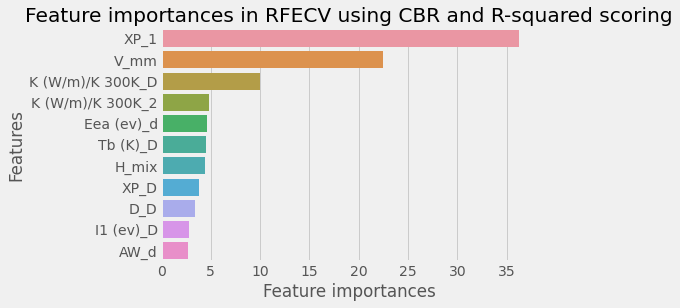

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


0     0.928934
1     0.956345
2     0.965878
3     0.976998
4     0.981911
5     0.982044
6     0.981605
7     0.982082
8     0.981320
9     0.982554
10    0.984102
11    0.983447
12    0.982516
13    0.983059
14    0.981327
15    0.981323
16    0.982404
17    0.982000
18    0.983053
19    0.982899
dtype: float64

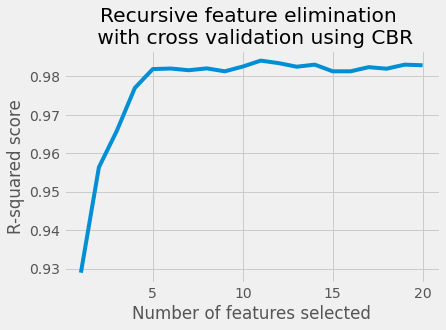

In [ ]:
# Get selected  features list
RFECV_selected_features_list = selected_X_train.loc[:, fitted_MIT_RFECV_CBR_model.support_].columns

# Store the selected feature subset
selected_feature_subsets_dict['MIT-RFECV'] = OrderedSet(RFECV_selected_features_list)

# Display
display(selected_feature_subsets_dict['MIT-RFECV'])
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")
print('--'*50)

# Get reduced input training dataframe
reduced_RFECV_CBR_X_train_df = pd.DataFrame(fitted_MIT_RFECV_CBR_model.transform(selected_X_train), columns=RFECV_selected_features_list,
                                            index=selected_X_train.index)

# Display input train data before feature elimination
print(f'Input train data before eliminating features: ')
display(selected_X_train)
print('--'*100)

# Display input train data after feature elimination
print(f'Input train data after eliminating features: ')
display(reduced_RFECV_CBR_X_train_df)
print('__'*100, '\n')


# Number of features selected
print(f'Number of features selected in recursive feature elimination with cross validation using CBR and R-squared scoring: \
    {fitted_MIT_RFECV_CBR_model.n_features_}')
print('--'*100)

# Get Feature importance
feature_importances_list = fitted_MIT_RFECV_CBR_model.estimator_.feature_importances_

# Create a dataframe 
feature_importances_df = pd.DataFrame()
feature_importances_df['Features'] = RFECV_selected_features_list
feature_importances_df['Feature importances'] = feature_importances_list

# Sort dataframe according to feature importances
feature_importances_df.sort_values(by='Feature importances', ascending=False, inplace=True)

# Display 
display(feature_importances_df.sort_values(by='Feature importances', ascending=True, inplace=False))


# Plot feature importances
sns.barplot(x=feature_importances_df['Feature importances'], y=feature_importances_df['Features'])
plt.title('Feature importances in RFECV using CBR and R-squared scoring')
plt.show()
print('--'*100)

# Calculate number of grid scores
n_features = len(selected_X_train.columns) # Total number of features before elimination
min_features_to_select = 1
step = 1
n_grid_scores = int(np.ceil((n_features - min_features_to_select) / step) + 1)


# Plot 
plt.style.use('fivethirtyeight')
sns.lineplot(x=range(min_features_to_select, n_grid_scores*step + min_features_to_select, step), 
         y=fitted_MIT_RFECV_CBR_model.grid_scores_)
plt.title('Recursive feature elimination \n with cross validation using CBR')
plt.xlabel('Number of features selected')
plt.ylabel('R-squared score')
plt.savefig("/content/drive/MyDrive/DDP/Stored plots/BM/MIT RFECV feature importances vs no of features.png", transparent=True)

# Display CV grid scores
display(pd.Series(fitted_MIT_RFECV_CBR_model.grid_scores_))

#### CV score

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")

# Create CBR estimator model instance
CBR_estimator_model = CatBoostRegressor(random_state=7)

Number of features selected: 11


In [ ]:
# Create validation model instance
fitted_MIT_RFECV_CV_model_dict = cross_validate(estimator=CBR_estimator_model, X=selected_X_train, y=y_train, scoring='r2', 
                                              cv=10, n_jobs=-1, verbose=100, return_train_score=True, return_estimator=True)

# Save fitted  model
save_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_RFECV_CV_model_dict.joblib'
dump(fitted_MIT_RFECV_CV_model_dict, save_path)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.3s
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   3 tasks      | elapsed:   12.9s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done   7 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done   8 out of  10 | elapsed:   24.8s remaining:    6.2s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:   30.8s finished


['/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_RFECV_CV_model_dict.joblib']

In [ ]:
# Load model dictionary
saved_path = '/content/drive/MyDrive/DDP/Stored models/BM/fitted_MIT_RFECV_CV_model_dict.joblib'
fitted_MIT_RFECV_CV_model_dict = load(saved_path)

# Convert to dataframe
fitted_MIT_RFECV_CV_model_df = pd.DataFrame.from_dict(fitted_MIT_RFECV_CV_model_dict)

# Display
fitted_MIT_RFECV_CV_model_df

,fit_time,score_time,estimator,test_score,train_score
0,5.751046,0.006130,<catboost.core.CatBoostRegressor object at 0x7...,0.991205,0.999560
1,5.691973,0.005775,<catboost.core.CatBoostRegressor object at 0x7...,0.988702,0.999579
2,5.496517,0.005382,<catboost.core.CatBoostRegressor object at 0x7...,0.979115,0.999604
3,5.600036,0.005426,<catboost.core.CatBoostRegressor object at 0x7...,0.985160,0.999643
4,5.967101,0.005589,<catboost.core.CatBoostRegressor object at 0x7...,0.973478,0.999600
5,5.890940,0.010807,<catboost.core.CatBoostRegressor object at 0x7...,0.970079,0.999710
6,5.931779,0.007091,<catboost.core.CatBoostRegressor object at 0x7...,0.982990,0.999639
7,5.834409,0.005543,<catboost.core.CatBoostRegressor object at 0x7...,0.985015,0.999694
8,5.959951,0.005461,<catboost.core.CatBoostRegressor object at 0x7...,0.989375,0.999670
9,5.943539,0.005610,<catboost.core.CatBoostRegressor object at 0x7...,0.985870,0.999543


In [ ]:
# Mean R-squared cross validation score
print(f"Mean R-squared cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].mean()}")
print(f"Std R-squared cross validation score: {fitted_MIT_RFECV_CV_model_dict['test_score'].std()}")


Mean R-squared cross validation score: 0.9830989410910442
Std R-squared cross validation score: 0.006558006575664397


#### Final model

In [ ]:
# Select subset of features to check
selected_X_train = X_train[selected_feature_subsets_dict['MIT-RFECV']] # Train data
selected_X_test = X_test[selected_feature_subsets_dict['MIT-RFECV']]  # Test data

# Print numbers of features selected
print(f"Number of features selected: {len(selected_feature_subsets_dict['MIT-RFECV'])}")

# Create CBR estimator model instance
final_CBR_estimator_model = fitted_MIT_RFECV_CBR_model.estimator_

Number of features selected: 11


,Measured B (GPa),Predicted B (GPa)
0,111.9,109.171410
1,108.9,116.532051
2,182.6,186.320420
3,50.2,54.876010
4,39.1,38.354246
5,92.9,101.427897
6,66.1,63.742370
7,31.1,30.395875
8,132.3,144.957905
9,112.6,115.309027


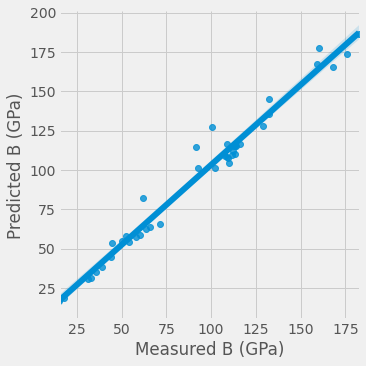

In [ ]:
# Get prediction on test data
y_test_predicted = final_CBR_estimator_model.predict(selected_X_test)

# Create dataframe of the target and predicted test data
y_test_data_df = pd.DataFrame(np.column_stack([y_test, y_test_predicted]), columns=['Measured B (GPa)', 'Predicted B (GPa)'])

# Display
display(y_test_data_df)

# Plot
sns.lmplot(data=y_test_data_df, x='Measured B (GPa)', y='Predicted B (GPa)')

In [ ]:
# Calculate root mean squared error (RMSE)
final_model_RMSE = metrics.mean_squared_error(y_true=y_test, y_pred=y_test_predicted, 
                                              squared=False) # If True returns MSE value, if False returns RMSE value.

# Display
final_model_RMSE

7.94993403455368

### Optimization

Useful resources:
1. https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74